In [1]:
## Problem Statement: Predicitng the strength of civil structure based on various attributes like cement,slag,ash,fine agg,coarse agg etc.




##Regression problem

In [2]:
## Importing data handling libraries
import pandas as pd 
import numpy as np
from collections import OrderedDict

## Importing data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

## Importing statistical libraries
import scipy.stats as scipy_stats

## Ignoring warnings
import warnings 
warnings.filterwarnings('ignore')

## Model building algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgboost
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error

## Clustering
from sklearn.cluster import KMeans

## Model Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## Learning Curve
from sklearn.model_selection import learning_curve

In [3]:
## Importing the dataset
concrete = pd.read_csv("Data (1).csv")
concrete.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

In [4]:
# Performing EDA
concrete.describe()

cement         slag          ash        water  superplastic  \
count  1030.000000  1030.000000  1030.000000  1030.000000   1030.000000   
mean    281.167864    73.895825    54.188350   181.567282      6.204660   
std     104.506364    86.279342    63.997004    21.354219      5.973841   
min     102.000000     0.000000     0.000000   121.800000      0.000000   
25%     192.375000     0.000000     0.000000   164.900000      0.000000   
50%     272.900000    22.000000     0.000000   185.000000      6.400000   
75%     350.000000   142.950000   118.300000   192.000000     10.200000   
max     540.000000   359.400000   200.100000   247.000000     32.200000   

         coarseagg      fineagg          age     strength  
count  1030.000000  1030.000000  1030.000000  1030.000000  
mean    972.918932   773.580485    45.662136    35.817961  
std      77.753954    80.175980    63.169912    16.705742  
min     801.000000   594.000000     1.000000     2.330000  
25%     932.000000   730.950000     7.000000    23.710000  
50%     968.000000   779.500000    28.000000    34.445000  
75%    1029.400000   824.000000    56.000000    46.135000  
max    1145.000000   992.600000   365.000000    82.600000

In [5]:
## Preparing a custom based EDA report
def custom_summary(df):
    result = []

    for col in list(df.columns):
        stats = OrderedDict({'FeatureName': col,'count':df[col].count(),'Datatype':df[col].dtype,
                                 'Mean':round(df[col].mean(),2),'SD':round(df[col].std(),2),'Variance':round(df[col].var(),2),
                                 'Min':round(df[col].min(),2),'Q1':round(df[col].quantile(0.25),2),'Median':round(df[col].median(),2),
                                 'Q3':round(df[col].quantile(0.75),2),'Max':round(df[col].max(),2),'Range':round(df[col].quantile(1),2)-round(df[col].quantile(0),2),
                                  'IQR':round(df[col].quantile(0.75),2)-round(df[col].quantile(0.25),2),
                                 'Kurtosis':round(df[col].kurt(),2),'Skewness':round(df[col].skew(),2)})
        result.append(stats)
        if df[col].skew() < -1:
            sk_label = 'Highly Negatively Skewed'
        elif -1 <= df[col].skew() < -0.5:
            sk_label = 'Moderately Negatively skewed'
        elif -0.5 <= df[col].skew() < 0:
            sk_label = 'Fairly Symmetric(Negative)'  
        elif 0 <= df[col].skew() < 0.5:
            sk_label = 'Fairly Symmetric(Positive)'
        elif 0.5 <= df[col].skew() < 1:
            sk_label = 'Moderately Positively skewed'
        elif df[col].skew() > 1:
            sk_label = 'Highly Positively Skewed'
        else:
            sk_label = 'Error'        
        stats['Skewness Comment'] = sk_label
        Upper_limit = stats['Q3'] + (1.5 *stats['IQR'])
        Lower_limit = stats['Q1'] - (1.5 *stats['IQR'])
        if len([x for x in df[col] if x < Lower_limit or x > Upper_limit ]) > 1:
            Out_Label = 'Has Outlier'
        else:
            Out_Label = 'No Outlier'
        stats['Outlier comment'] = Out_Label
    resultdf = pd.DataFrame(data = result)
    return resultdf 

In [6]:
# Handling missing values
# Approach 1: If the % of missing values is lesser than 2%, we can adopt to drop missing values(records)
# Approach 2: Replace the missing values with mean or median
# Approach 3: Creating "unknown" categories for missing values
# Approach 4: Use ML models to predict the missing values

In [7]:
custom_summary(concrete)

FeatureName  count Datatype    Mean      SD  Variance     Min      Q1  \
0        cement   1030  float64  281.17  104.51  10921.58  102.00  192.38   
1          slag   1030  float64   73.90   86.28   7444.12    0.00    0.00   
2           ash   1030  float64   54.19   64.00   4095.62    0.00    0.00   
3         water   1030  float64  181.57   21.35    456.00  121.80  164.90   
4  superplastic   1030  float64    6.20    5.97     35.69    0.00    0.00   
5     coarseagg   1030  float64  972.92   77.75   6045.68  801.00  932.00   
6       fineagg   1030  float64  773.58   80.18   6428.19  594.00  730.95   
7           age   1030    int64   45.66   63.17   3990.44    1.00    7.00   
8      strength   1030  float64   35.82   16.71    279.08    2.33   23.71   

   Median       Q3     Max   Range     IQR  Kurtosis  Skewness  \
0  272.90   350.00   540.0  438.00  157.62     -0.52      0.51   
1   22.00   142.95   359.4  359.40  142.95     -0.51      0.80   
2    0.00   118.30   200.1  200.10  118.30     -1.33      0.54   
3  185.00   192.00   247.0  125.20   27.10      0.12      0.07   
4    6.40    10.20    32.2   32.20   10.20      1.41      0.91   
5  968.00  1029.40  1145.0  344.00   97.40     -0.60     -0.04   
6  779.50   824.00   992.6  398.60   93.05     -0.10     -0.25   
7   28.00    56.00   365.0  364.00   49.00     12.17      3.27   
8   34.45    46.14    82.6   80.27   22.43     -0.31      0.42   

               Skewness Comment Outlier comment  
0  Moderately Positively skewed      No Outlier  
1  Moderately Positively skewed     Has Outlier  
2  Moderately Positively skewed      No Outlier  
3    Fairly Symmetric(Positive)     Has Outlier  
4  Moderately Positively skewed     Has Outlier  
5    Fairly Symmetric(Negative)      No Outlier  
6    Fairly Symmetric(Negative)     Has Outlier  
7      Highly Positively Skewed     Has Outlier  
8    Fairly Symmetric(Positive)     Has Outlier

In [8]:
## Outlier detection

In [9]:
def Outlierdetectionplots(df,col):
    
    f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (20,10))
    #col = 'cement'
    kwargs = {'fontsize':20,'color':'black'}
    ax1.set_title(col + " boxplot",**kwargs)
    ax1.set_xlabel('Box density',**kwargs)
    ax1.set_ylabel(col + ' values',**kwargs)
    sns.boxplot(df[col],ax=ax1, orient='v',color='red')

    # Plotting histogram with outliers
    sns.distplot(df[col],ax=ax2,color='red',fit = scipy_stats.norm)
    ax2.axvline(df[col].mean(),color='green',linestyle= 'dashed')
    ax2.axvline(df[col].median(),color='black',linestyle= 'dashed')
    ax2.set_title(col + " Histogram with Outliers",**kwargs)
    ax2.set_xlabel('Density',**kwargs)
    ax2.set_ylabel(col + ' values',**kwargs) 

    # Plotting histogram without outliers
    upper_bound,lower_bound = np.percentile(df[col],[5,95])
    y = pd.DataFrame(np.clip(df[col],upper_bound,lower_bound)) #clip filters out the values less than 5% and more than 95%
    sns.distplot(y[col],ax=ax3,color = 'green',fit = scipy_stats.norm)
    ax3.axvline(df[col].mean(),color='green',linestyle= 'dashed')
    ax3.axvline(df[col].median(),color='black',linestyle= 'dashed')

    ax3.set_title(col + " Histogram without Outliers",**kwargs)
    ax3.set_xlabel(' Density',**kwargs)
    ax3.set_ylabel(col + ' values',**kwargs) 
    
    plt.show()

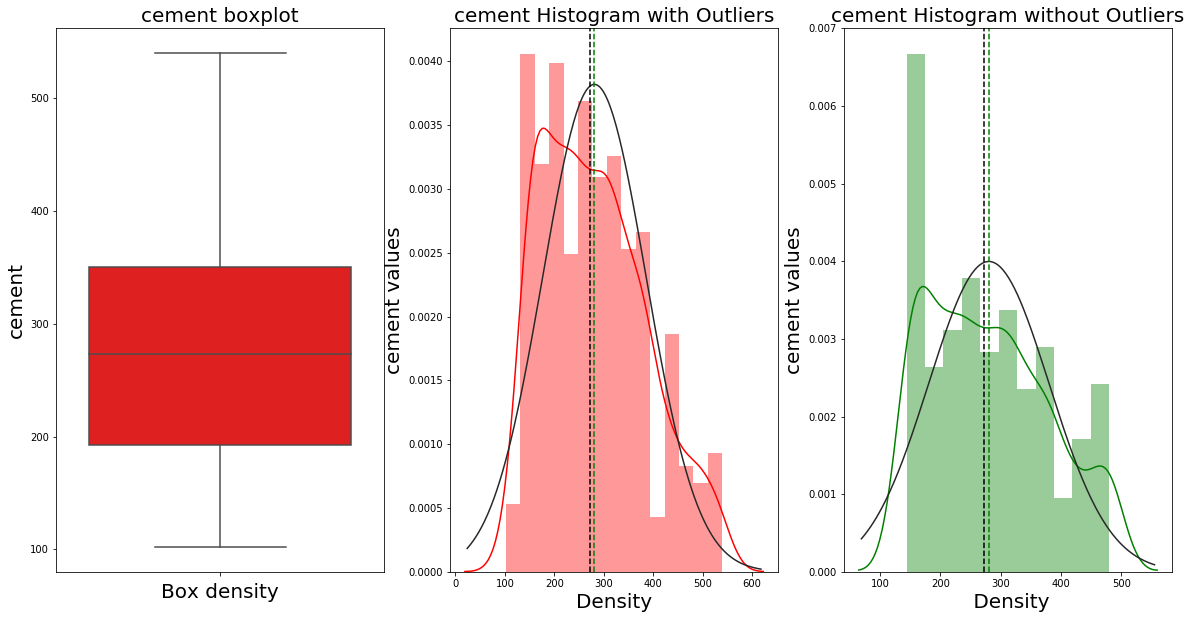

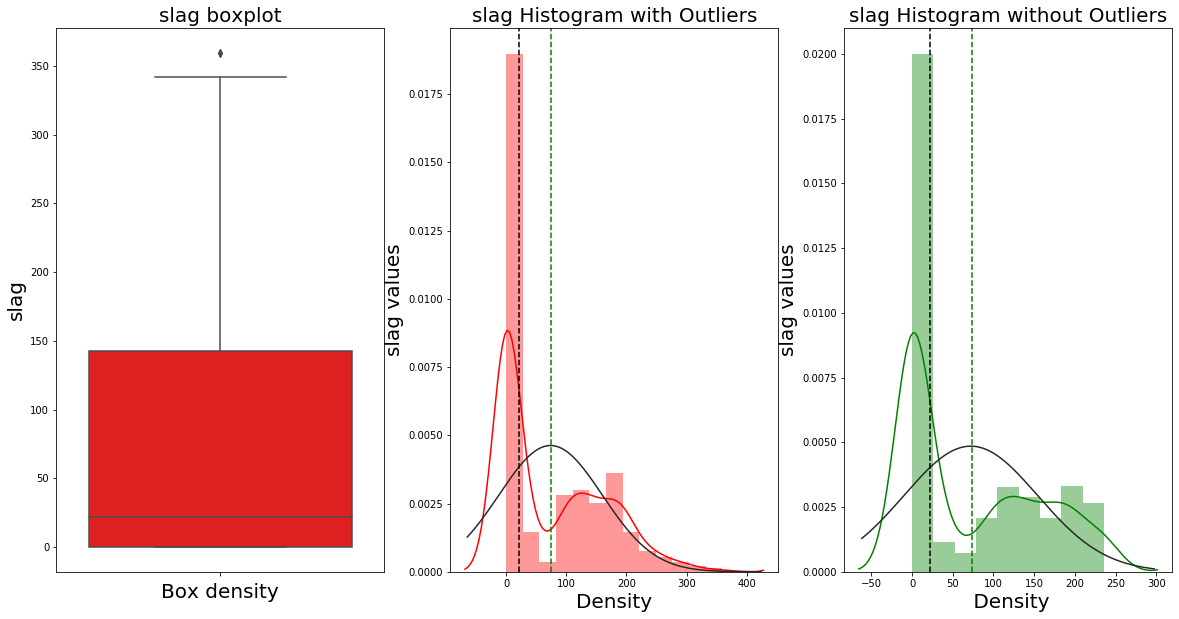

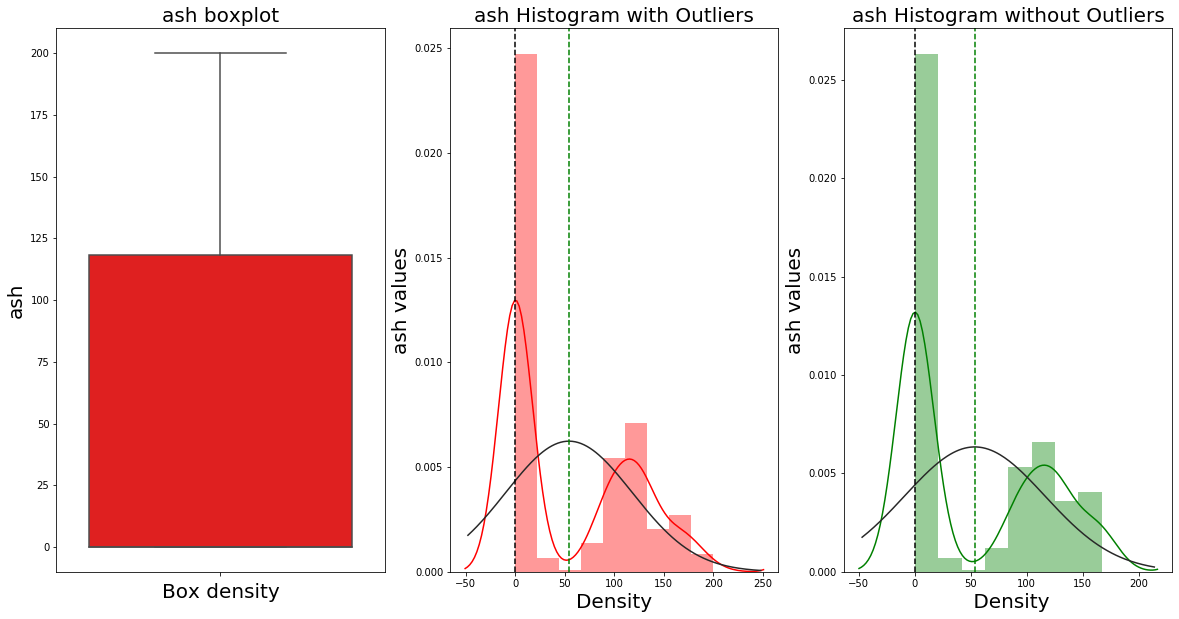

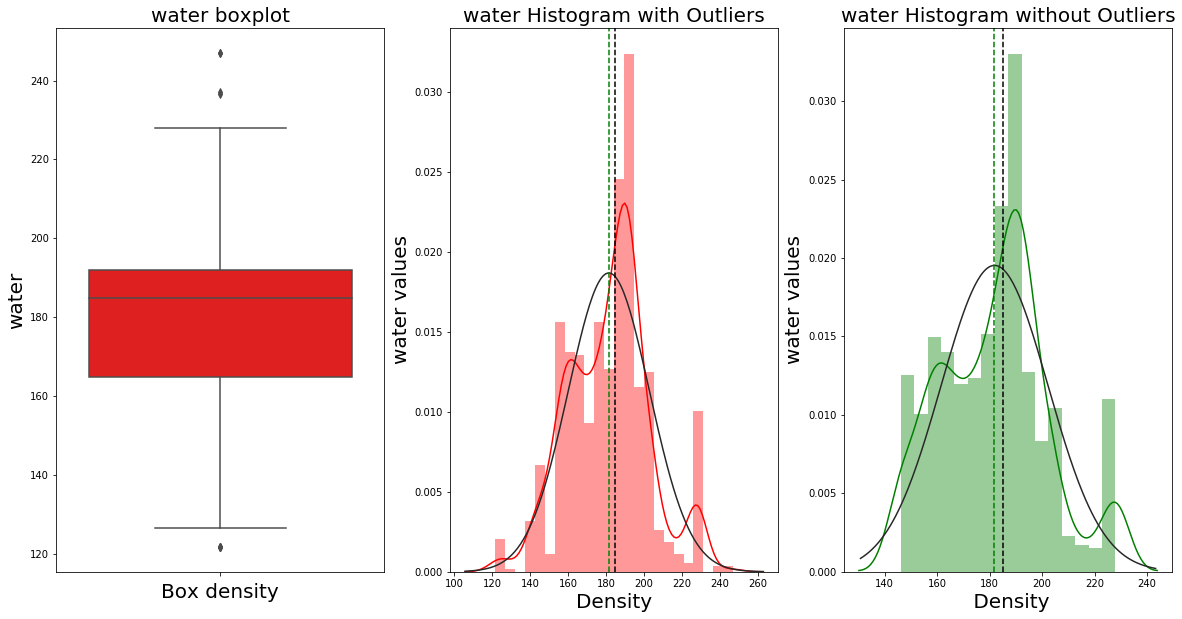

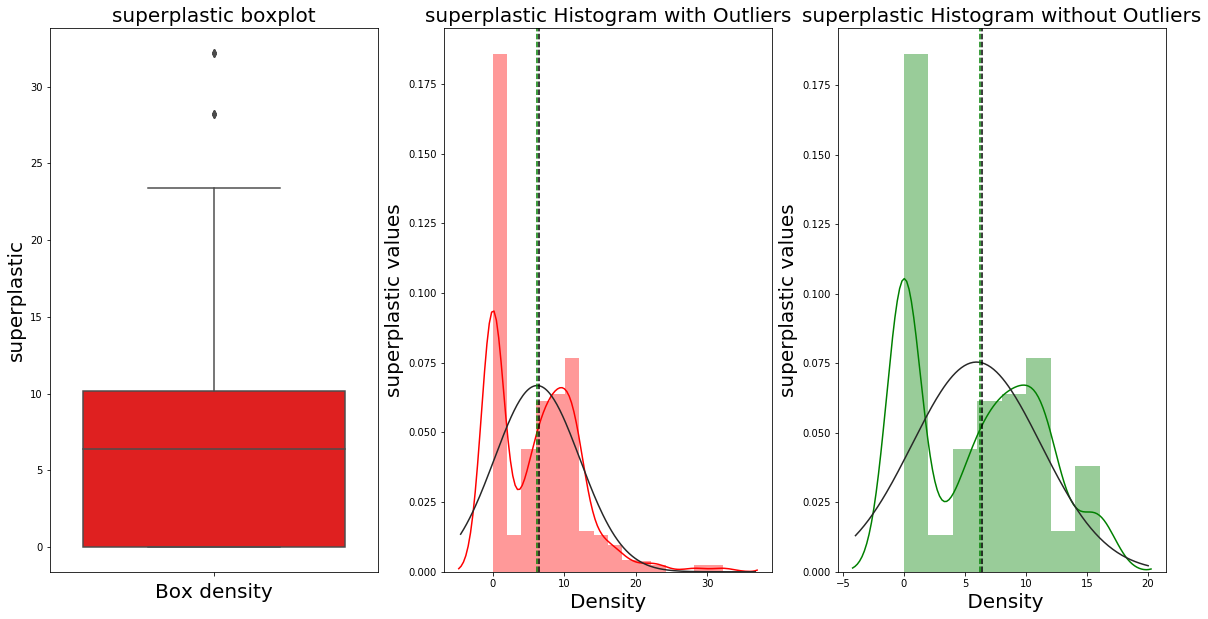

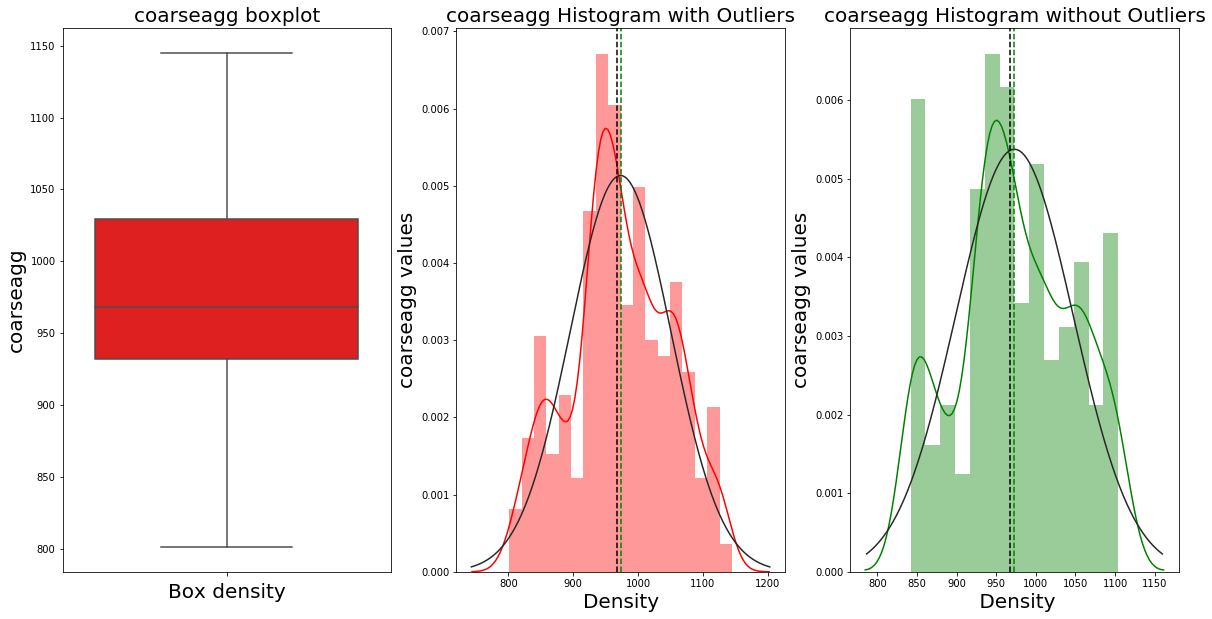

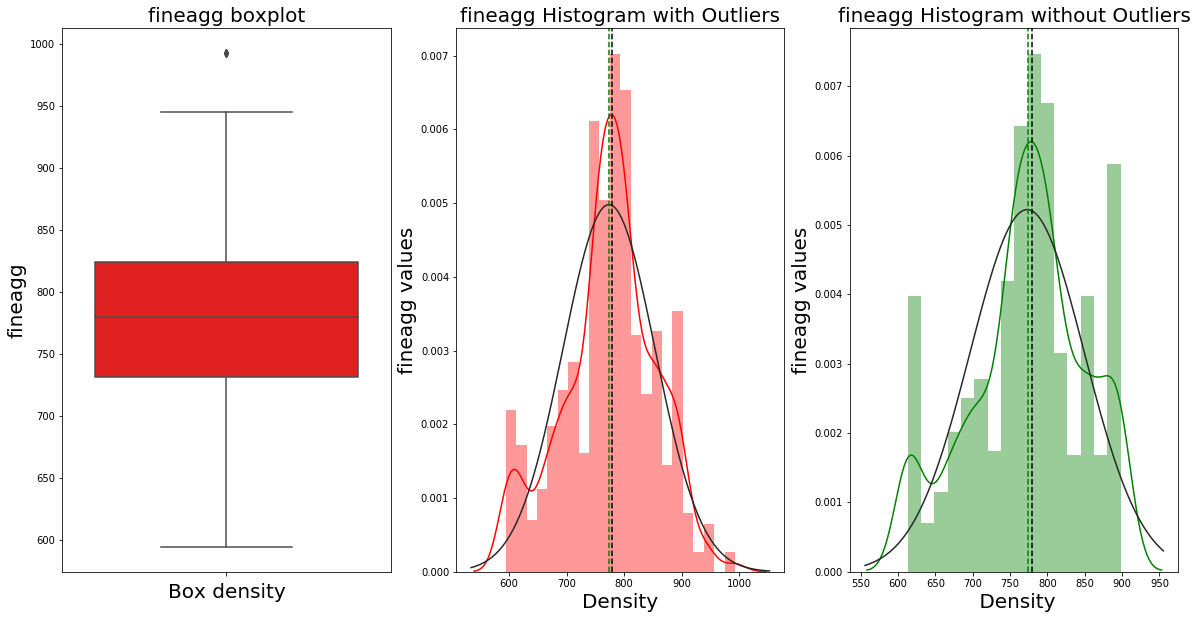

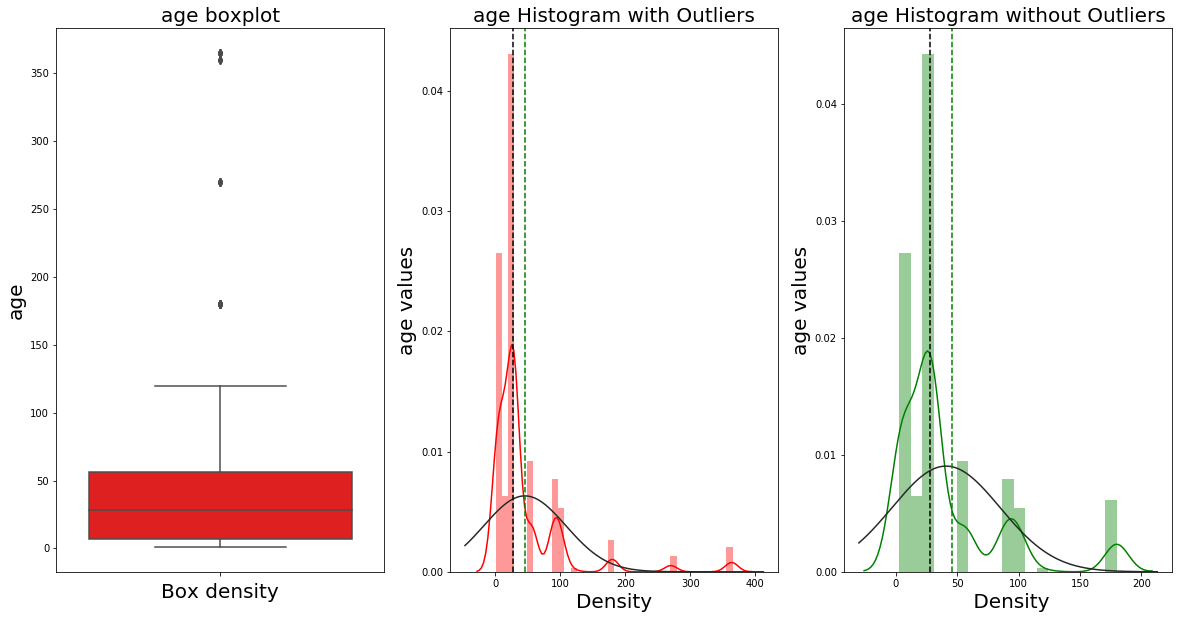

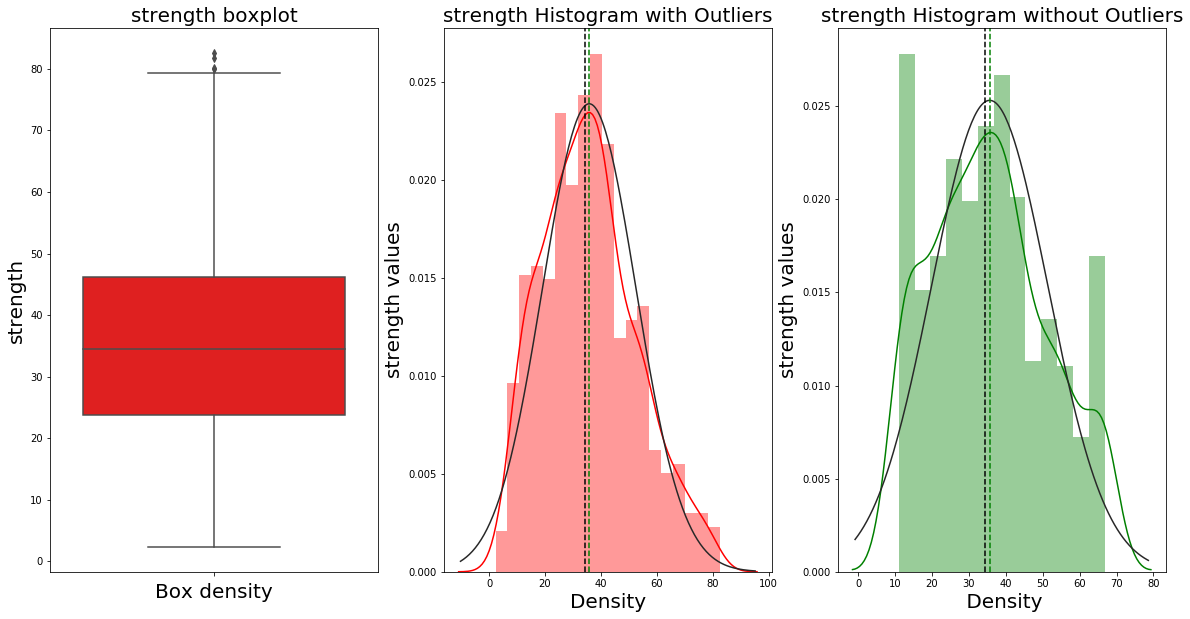

In [10]:
for col in list(concrete.columns):
    Outlierdetectionplots(concrete,col)

In [11]:
new_concrete = concrete.copy()

In [12]:
new_concrete.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

## Identifying outliers with the help of standard deviation

In [13]:
def ReplaceOutliers(df,col,method = 'Std',strategy = 'median'):
    if method == 'Std':
        col_mean,col_std,col_Q2 = new_concrete[col].mean(),new_concrete[col].std(),new_concrete[col].median()
        cut_off = col_std*2
        lowerlim,upperlim = col_mean-cut_off,col_mean+cut_off
        print(f'Outlier for {col} are:',np.sort([x for x in new_concrete[col]if x<lowerlim or x>upperlim]),'\n')

        # Replacing outliers with mean or median
        strategy = 'median'
        if strategy == 'median':
            new_concrete.loc[(new_concrete[col] < lowerlim) | (new_concrete[col] > upperlim),col] = col_Q2
        else:
            new_concrete.loc[(new_concrete[col] < lowerlim) | (new_concrete[col] > upperlim),col] = col_mean()
            
    elif method == 'Quantile':
        col_mean,col_Q2,col_Q1,col_Q3 = new_concrete[col].mean(),new_concrete[col].median(),new_concrete[col].quantile(0.25),new_concrete[col].quantile(0.75)
        IQR = col_Q3-col_Q1
        lowerlim,upperlim = (col_Q1 - 1.5*IQR),(col_Q3 + 1.5*IQR)
        print(f'Outlier for {col} are:',np.sort([x for x in new_concrete[col]if x<lowerlim or x>upperlim]),'\n')

        # Replacing outliers with mean or median
        strategy = 'median'
        if strategy == 'median':
            new_concrete.loc[(new_concrete[col] < lowerlim) | (new_concrete[col] > upperlim),col] = col_Q2
        else:
            new_concrete.loc[(new_concrete[col] < lowerlim) | (new_concrete[col] > upperlim),col] = col_mean()
    else:
        print('Error')
    

In [14]:
for col in list(new_concrete.columns):
    if (new_concrete[col].skew() >= 1) | (new_concrete[col].skew() <= -1):
        ReplaceOutliers(new_concrete,col,method = 'Quantile',strategy = 'median')
    else:
        ReplaceOutliers(new_concrete,col,method = 'Std',strategy = 'median')     
    

Outlier for cement are: [491.  491.  491.  491.  491.  491.  491.  491.  500.  500.  500.  500.
 500.  500.  500.  500.  500.  500.  500.1 505.  516.  516.  520.  520.
 522.  522.  525.  525.  525.  525.  525.  525.  525.  528.  531.3 531.3
 531.3 531.3 531.3 540.  540.  540.  540.  540.  540.  540.  540.  540. ] 

Outlier for slag are: [250.  250.  250.2 250.2 250.2 250.2 259.7 260.  262.2 262.2 262.2 262.2
 262.2 272.8 272.8 282.8 282.8 282.8 282.8 288.  288.  288.  288.  290.2
 290.2 305.3 305.3 305.3 305.3 316.1 316.1 342.1 342.1 359.4 359.4] 

Outlier for ash are: [183.9 184.  185.  185.  185.3 187.  190.  193.  194.  194.9 195.  195.
 195.  200.  200.1] 

Outlier for water are: [121.8 121.8 121.8 121.8 121.8 126.6 126.6 126.6 126.6 126.6 127.  127.3
 137.8 137.8 137.8 137.8 137.8 228.  228.  228.  228.  228.  228.  228.
 228.  228.  228.  228.  228.  228.  228.  228.  228.  228.  228.  228.
 228.  228.  228.  228.  228.  228.  228.  228.  228.  228.  228.  228.
 228.  228.  228. 

## Visualising data with outliers

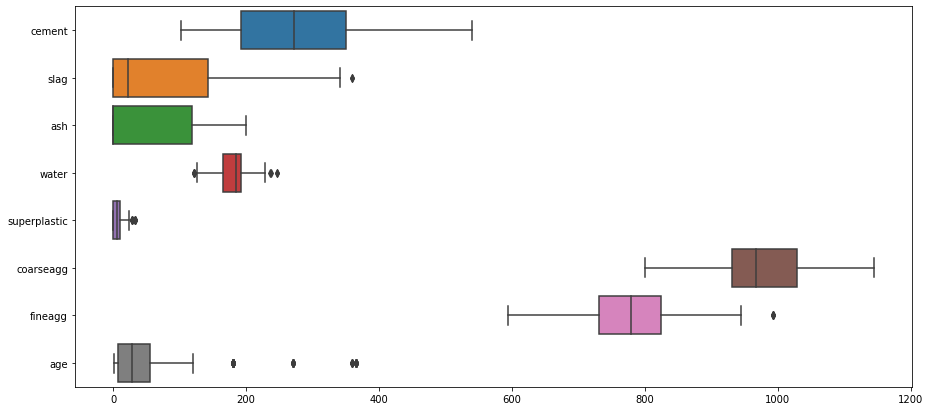

In [15]:
fig = plt.figure(figsize=(15,7))
ax = sns.boxplot(data=concrete.iloc[:,0:-1],orient='h')

## Visualising data without outliers

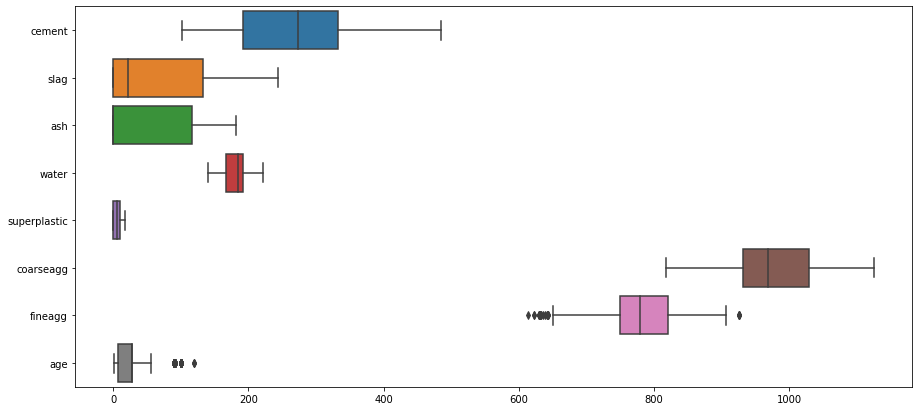

In [16]:
fig = plt.figure(figsize=(15,7))
ax = sns.boxplot(data=new_concrete.iloc[:,0:-1],orient='h') 

In [17]:
custom_summary(new_concrete) 

FeatureName  count Datatype    Mean     SD  Variance     Min      Q1  \
0        cement   1030  float64  269.84  90.60   8208.92  102.00  192.38   
1          slag   1030  float64   64.94  76.80   5898.70    0.00    0.00   
2           ash   1030  float64   51.40  62.10   3856.78    0.00    0.00   
3         water   1030  float64  180.02  16.73    279.98  140.00  166.60   
4  superplastic   1030  float64    5.66   5.00     25.03    0.00    0.00   
5     coarseagg   1030  float64  973.36  74.80   5594.39  817.90  932.00   
6       fineagg   1030  float64  781.74  62.95   3962.86  614.00  750.00   
7           age   1030  float64   32.26  27.80    773.05    1.00    7.00   
8      strength   1030  float64   34.31  14.72    216.80    3.32   23.74   

   Median       Q3      Max   Range     IQR  Kurtosis  Skewness  \
0  272.85   332.50   485.00  383.00  140.12     -0.72      0.33   
1   22.00   132.40   243.50  243.50  132.40     -1.01      0.72   
2    0.00   116.00   182.10  182.10  116.00     -1.37      0.56   
3  185.00   192.00   221.40   81.40   25.40     -0.51     -0.33   
4    6.40     9.90    18.00   18.00    9.90     -1.19      0.20   
5  968.00  1028.40  1125.00  307.10   96.40     -0.59     -0.02   
6  779.50   820.00   925.70  311.70   70.00     -0.19     -0.09   
7   28.00    28.00   120.00  119.00   21.00      0.79      1.29   
8   34.45    43.78    68.75   65.43   20.04     -0.59      0.19   

               Skewness Comment Outlier comment  
0    Fairly Symmetric(Positive)      No Outlier  
1  Moderately Positively skewed      No Outlier  
2  Moderately Positively skewed      No Outlier  
3    Fairly Symmetric(Negative)      No Outlier  
4    Fairly Symmetric(Positive)      No Outlier  
5    Fairly Symmetric(Negative)      No Outlier  
6    Fairly Symmetric(Negative)     Has Outlier  
7      Highly Positively Skewed     Has Outlier  
8    Fairly Symmetric(Positive)      No Outlier

In [18]:
custom_summary(concrete)

FeatureName  count Datatype    Mean      SD  Variance     Min      Q1  \
0        cement   1030  float64  281.17  104.51  10921.58  102.00  192.38   
1          slag   1030  float64   73.90   86.28   7444.12    0.00    0.00   
2           ash   1030  float64   54.19   64.00   4095.62    0.00    0.00   
3         water   1030  float64  181.57   21.35    456.00  121.80  164.90   
4  superplastic   1030  float64    6.20    5.97     35.69    0.00    0.00   
5     coarseagg   1030  float64  972.92   77.75   6045.68  801.00  932.00   
6       fineagg   1030  float64  773.58   80.18   6428.19  594.00  730.95   
7           age   1030    int64   45.66   63.17   3990.44    1.00    7.00   
8      strength   1030  float64   35.82   16.71    279.08    2.33   23.71   

   Median       Q3     Max   Range     IQR  Kurtosis  Skewness  \
0  272.90   350.00   540.0  438.00  157.62     -0.52      0.51   
1   22.00   142.95   359.4  359.40  142.95     -0.51      0.80   
2    0.00   118.30   200.1  200.10  118.30     -1.33      0.54   
3  185.00   192.00   247.0  125.20   27.10      0.12      0.07   
4    6.40    10.20    32.2   32.20   10.20      1.41      0.91   
5  968.00  1029.40  1145.0  344.00   97.40     -0.60     -0.04   
6  779.50   824.00   992.6  398.60   93.05     -0.10     -0.25   
7   28.00    56.00   365.0  364.00   49.00     12.17      3.27   
8   34.45    46.14    82.6   80.27   22.43     -0.31      0.42   

               Skewness Comment Outlier comment  
0  Moderately Positively skewed      No Outlier  
1  Moderately Positively skewed     Has Outlier  
2  Moderately Positively skewed      No Outlier  
3    Fairly Symmetric(Positive)     Has Outlier  
4  Moderately Positively skewed     Has Outlier  
5    Fairly Symmetric(Negative)      No Outlier  
6    Fairly Symmetric(Negative)     Has Outlier  
7      Highly Positively Skewed     Has Outlier  
8    Fairly Symmetric(Positive)     Has Outlier

In [19]:
concrete.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

## Relationship study

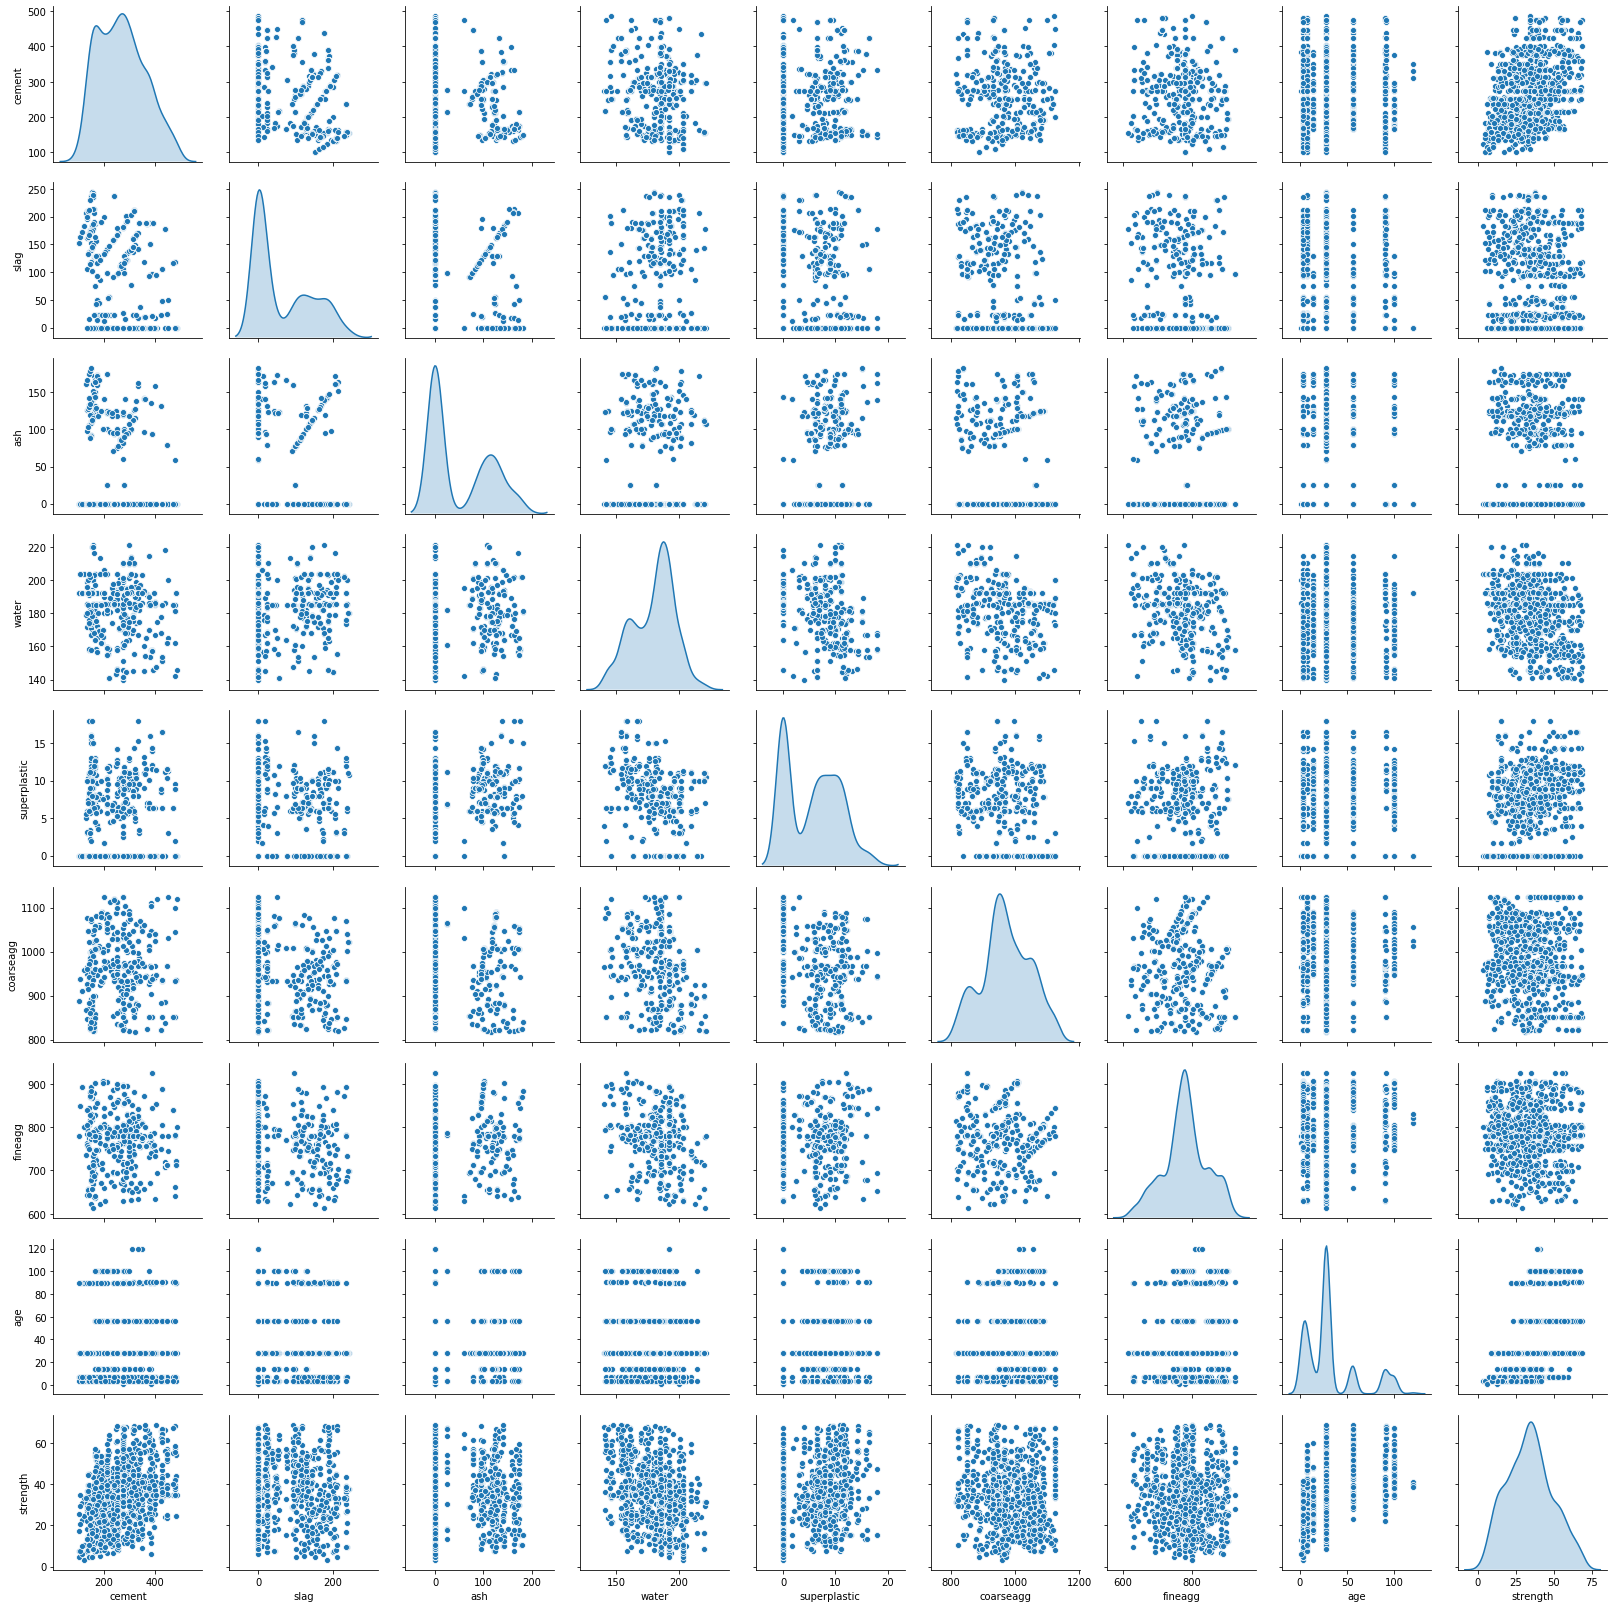

In [20]:
sns.pairplot(new_concrete,diag_kind='kde') # kde = kernel density plots

In [21]:
# strength vs cement: There is a positive correlation
# strength vs slag: There  is no correlation
# strength vs superplast: There is slightly positive correlation
# strength vs courseagg: There is a negative correlation
# strength vs fineagg: There is no correlation
# strength vs age: To some extent correlation is there 

## Multivariate Analysis

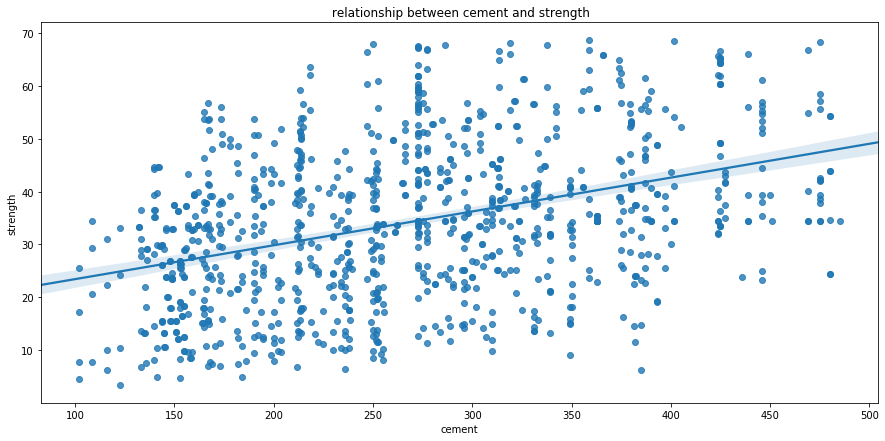

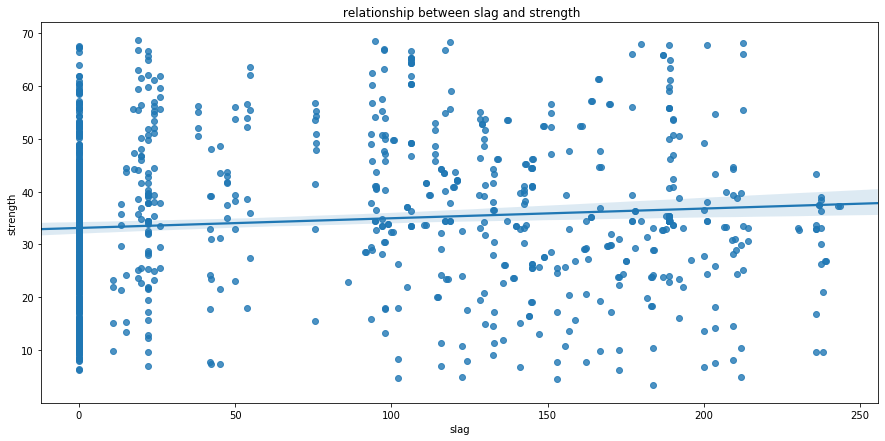

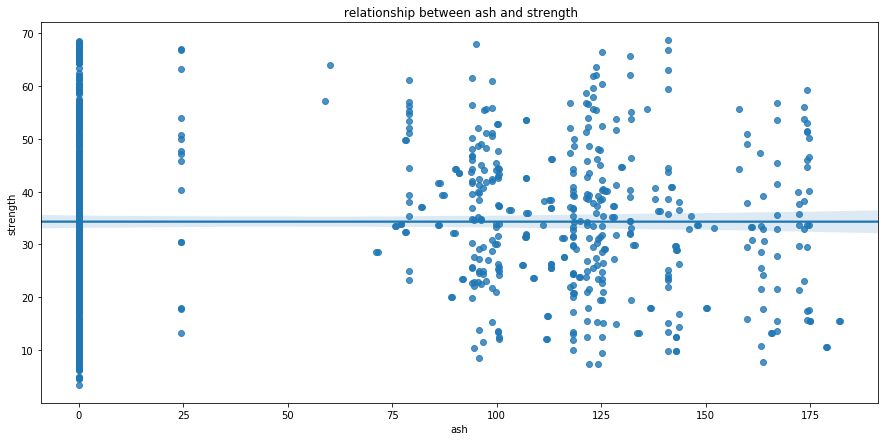

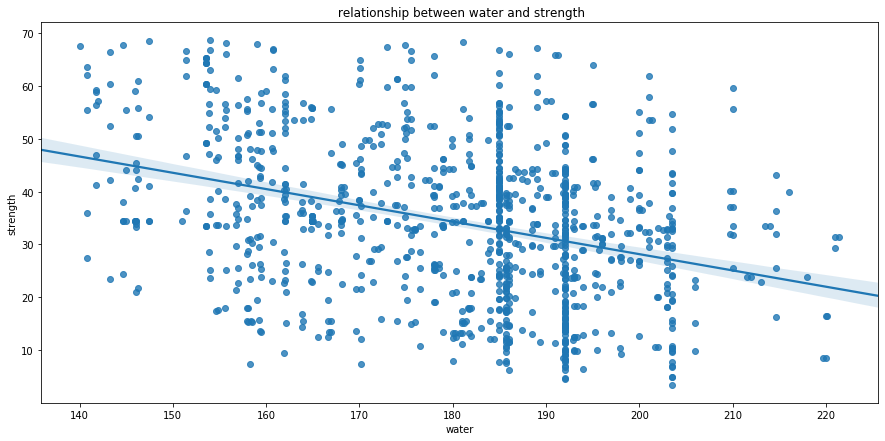

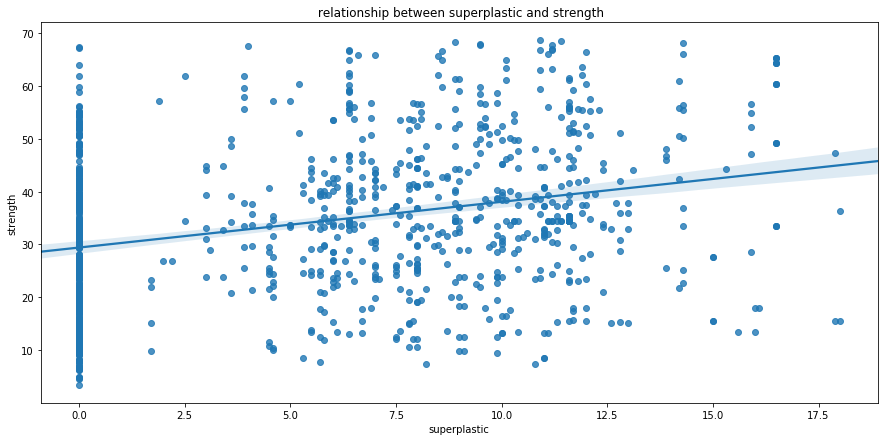

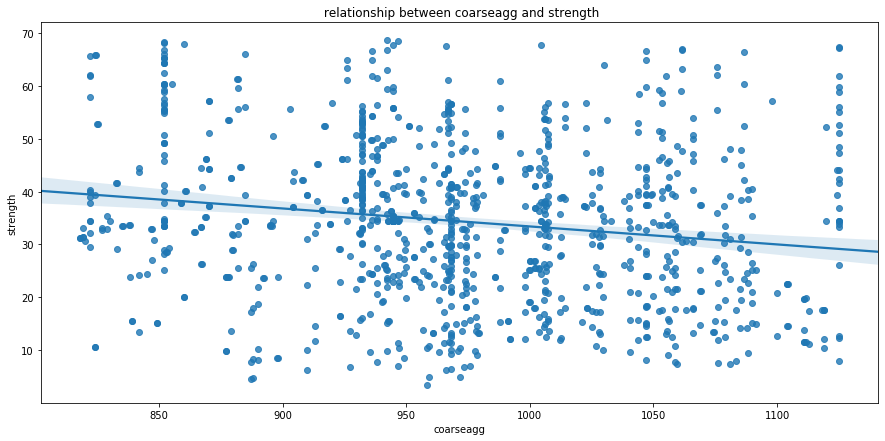

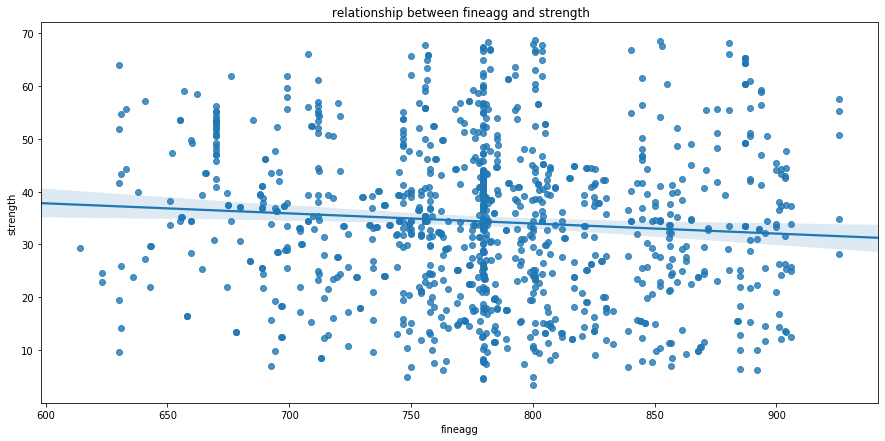

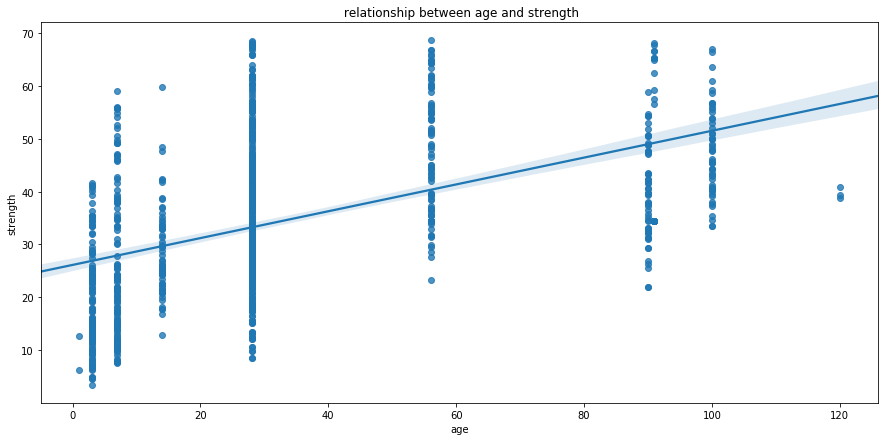

In [22]:
for col in list(new_concrete):
    if col!='strength':
        fig,ax1=plt.subplots(figsize=(15,7))
        sns.regplot(x=new_concrete[col],y=new_concrete['strength'],ax=ax1).set_title(f' relationship between {col} and strength')  
    
    # Heterosedacity -If there is a variation in the data points wrt regression line
    # Homosedacity - If there is a constant variation wrt regression line

## Performing correlation matrix

In [23]:
corr_matrix= new_concrete.corr()
corr_matrix

cement      slag       ash     water  superplastic  coarseagg  \
cement        1.000000 -0.185233 -0.346269 -0.150948      0.044721  -0.192605   
slag         -0.185233  1.000000 -0.269653  0.056700      0.070402  -0.347618   
ash          -0.346269 -0.269653  1.000000 -0.262010      0.479967   0.034323   
water        -0.150948  0.056700 -0.262010  1.000000     -0.608224  -0.141299   
superplastic  0.044721  0.070402  0.479967 -0.608224      1.000000  -0.204316   
coarseagg    -0.192605 -0.347618  0.034323 -0.141299     -0.204316   1.000000   
fineagg      -0.039234 -0.235000  0.049292 -0.309017      0.140312  -0.048816   
age          -0.015355 -0.013256  0.066563 -0.071037      0.063329   0.014395   
strength      0.394176  0.095825 -0.000137 -0.350173      0.294238  -0.172807   

               fineagg       age  strength  
cement       -0.039234 -0.015355  0.394176  
slag         -0.235000 -0.013256  0.095825  
ash           0.049292  0.066563 -0.000137  
water        -0.309017 -0.071037 -0.350173  
superplastic  0.140312  0.063329  0.294238  
coarseagg    -0.048816  0.014395 -0.172807  
fineagg       1.000000  0.065396 -0.081613  
age           0.065396  1.000000  0.479482  
strength     -0.081613  0.479482  1.000000

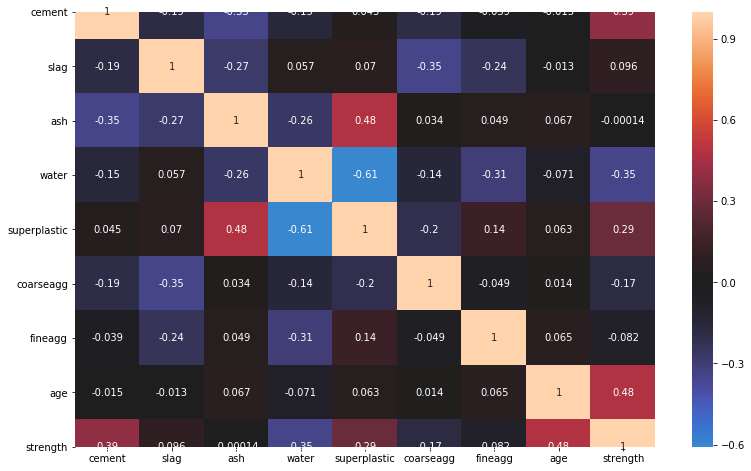

In [24]:
fig,ax = plt.subplots(figsize=(13,8))
sns.heatmap(corr_matrix,center = 0,annot=True)

## Feature Interaction
### Multicolinearity detection - Mumticolinearity can be detected using two methods
#### 1. Using Correlation matrix
#### 2.VIX (Variance inflation index)

In [25]:
## VIX work as follows:
### 1. It will regress every independent variable with each other independent variable and calculate R-square
### 2. VIX of a particular variable is calculated as VIX = 1/(1-Rsquare)
### 3. Interpretation - A variable with VIX > 5 is considered as highly colinear and hence needs treatment

In [26]:
x = new_concrete.iloc[:,:-1]

def VIF_multicol(x):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    VIF = pd.DataFrame()
    VIF["VIF factor"]= [variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    VIF["features"] = x.columns
    return VIF.sort_values(by='VIF factor',ascending=False).round(1)

In [27]:
VIF_multicol(x)

VIF factor      features
6       109.2       fineagg
5       108.2     coarseagg
3        97.0         water
0        12.8        cement
4         4.8  superplastic
2         3.4           ash
1         2.4          slag
7         2.4           age

In [28]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x) 

In [29]:
## Implement PCA for the above data
columns=[]
from sklearn.decomposition import PCA
pca = PCA()
principal_components = pca.fit_transform(x)
pdf = pd.DataFrame(principal_components)
pdf.head()

0         1         2         3         4         5         6  \
0 -2.296594  0.433178  1.773723  0.413194 -0.598378 -0.855379  0.044702   
1  2.003374 -1.096119  0.935192 -0.945688  0.076164 -1.000818  0.100898   
2  0.612353 -0.683839 -0.126979  0.085047 -1.178107  0.893385  0.103874   
3 -1.905788  0.601556  0.410337 -0.222691  0.892294 -0.110215 -0.691048   
4 -1.087097  0.351744  1.776861 -0.203065  0.778867 -1.398280  1.244397   

          7  
0 -0.236221  
1  0.011127  
2 -0.268654  
3  0.672866  
4  0.018874

In [30]:
pca.explained_variance_ratio_

array([0.25683332, 0.18275041, 0.16341323, 0.12418022, 0.11450086,
       0.10471377, 0.03047457, 0.02313362])

In [31]:
np.cumsum(pca.explained_variance_ratio_)

array([0.25683332, 0.43958374, 0.60299697, 0.72717719, 0.84167805,
       0.94639181, 0.97686638, 1.        ])

In [32]:
pdf = pdf.iloc[:,0:5]

In [33]:
pdf.head()

0         1         2         3         4
0 -2.296594  0.433178  1.773723  0.413194 -0.598378
1  2.003374 -1.096119  0.935192 -0.945688  0.076164
2  0.612353 -0.683839 -0.126979  0.085047 -1.178107
3 -1.905788  0.601556  0.410337 -0.222691  0.892294
4 -1.087097  0.351744  1.776861 -0.203065  0.778867

In [34]:
#sns.pairplot(data=pdf)

In [35]:
VIF_multicol(pdf)

VIF factor  features
2         1.0         2
3         1.0         3
0         1.0         0
1         1.0         1
4         1.0         4

In [36]:
pdf.head()
pdf = pdf.join(new_concrete[['strength']],how='left')
pdf.head()

0         1         2         3         4  strength
0 -2.296594  0.433178  1.773723  0.413194 -0.598378     29.89
1  2.003374 -1.096119  0.935192 -0.945688  0.076164     23.51
2  0.612353 -0.683839 -0.126979  0.085047 -1.178107     29.22
3 -1.905788  0.601556  0.410337 -0.222691  0.892294     45.85
4 -1.087097  0.351744  1.776861 -0.203065  0.778867     18.29

## Model Building

In [37]:
## This user Defined function is built for Train Test Split
def TrainTestsplit(df,target,test_size=0.3):
    x=df.drop(target,axis=1)
    y=df[target]
    return train_test_split(x,y,test_size=test_size,random_state=100)

In [38]:
Var = TrainTestsplit(new_concrete,'strength')

In [39]:
## New uder defined function for building a model
def Regressionmodel(model_name,model,df,target,test_size=0.3):
    x_train,x_test,y_train,y_test = TrainTestsplit(df,target,test_size=0.3)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    lr = [model_name,r2_score(y_test,y_pred),rmse]
    return lr

In [40]:
## Model predictions before PCA
linear = LinearRegression()
Regressionmodel('linear_model',linear,new_concrete,'strength')

['linear_model', 0.5290792207520708, 10.316595500372953]

In [41]:
## Model predictions after PCA
Regressionmodel('linear_model',linear,pdf,'strength')

['linear_model', 0.5144962839110836, 10.47511392563929]

In [42]:
## Even though, after performing PCA, there is no much big difference is observed with R-square and RMSE.
## hence, we can still consider the original data(before performing PCA,i.e. new_concrete)

In [43]:
## !pip install xgboost - To install a library in jupyter notebook

In [44]:
## Building multiple models
def model_building(df,target,test_size=0.3):
    col_names = ['model_name','R-square','RMSE']
    result=pd.DataFrame(columns=col_names)
    result.loc[len(result)]=Regressionmodel('Linear Regression',LinearRegression(),df,target,test_size)
    result.loc[len(result)]=Regressionmodel('Lasso Regression',Lasso(),df,target,test_size)
    result.loc[len(result)]=Regressionmodel('Ridge Regression',Ridge(),df,target,test_size)
    result.loc[len(result)]=Regressionmodel('Decision Tree Regressor',DecisionTreeRegressor(),df,target,test_size)
    result.loc[len(result)]=Regressionmodel('Random Forest Regressor',RandomForestRegressor(),df,target,test_size)
    result.loc[len(result)]=Regressionmodel('Adaboost',AdaBoostRegressor(),df,target,test_size)
    result.loc[len(result)]=Regressionmodel('G-Boost',GradientBoostingRegressor(),df,target,test_size)
    result.loc[len(result)]=Regressionmodel('XGBoost',XGBRegressor(),df,target,test_size)
    result.loc[len(result)]=Regressionmodel('Support Vector Regressor',SVR(),df,target,test_size)
    result.loc[len(result)]=Regressionmodel('KNN',KNeighborsRegressor(),df,target,test_size)    
    return result

In [45]:
result_newconcrete=model_building(new_concrete,'strength')
result_pdf=model_building(pdf,'strength')
print('************Result before PCA***************')
print(result_newconcrete)
print('\n\n************Result after PCA***************')
print(result_pdf)

[01:17:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:17:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
************Result before PCA***************
                 model_name  R-square       RMSE
0         Linear Regression  0.529079  10.316596
1          Lasso Regression  0.529903  10.307571
2          Ridge Regression  0.529079  10.316593
3   Decision Tree Regressor  0.723871   7.899839
4   Random Forest Regressor  0.777071   7.098155
5                  Adaboost  0.678555   8.523454
6                   G-Boost  0.783489   6.995242
7                   XGBoost  0.788352   6.916231
8  Support Vector Regressor  0.023676  14.854546
9                       KNN  0.508138  10.543479


************Result after PCA***************
                 model_name  R-square     

## Identification of Clusters

In [46]:
# Splitting X and Y
x = new_concrete.iloc[:,:-1]
y = new_concrete.iloc[:,-1]

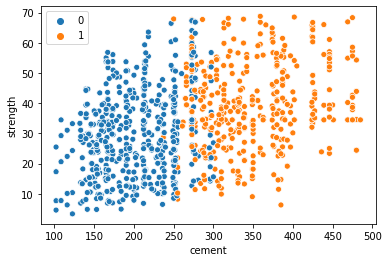

In [47]:
labels = KMeans(n_clusters=2, random_state=100).fit_predict(x)
sns.scatterplot(new_concrete['cement'],new_concrete.strength,hue=labels)

In [48]:
## Finding clusters form every variable with all other variables
def kmeansplot(x,t_col,labels):
    #x=new_concrete.copy()
    #t_col='strength'

    columns = list(set(list(x.columns))-set(new_concrete['strength']))
    r = int(len(columns)/2) 
    if r%2 == 0:
        r = r
    else:
        r = r+1
    f,ax=plt.subplots(r,2,figsize=(15,15))
    a = 0
    for col in range (0,r): #This for loop for all the rows
        for j in range (0,2): # This for loop is for the columns
            if a != len(columns):
                ax[col][j].scatter(x[t_col],x[columns[a]],c=labels)
                ax[col][j].set_xlabel(t_col)
                ax[col][j].set_ylabel(columns[a])
                a = a+1

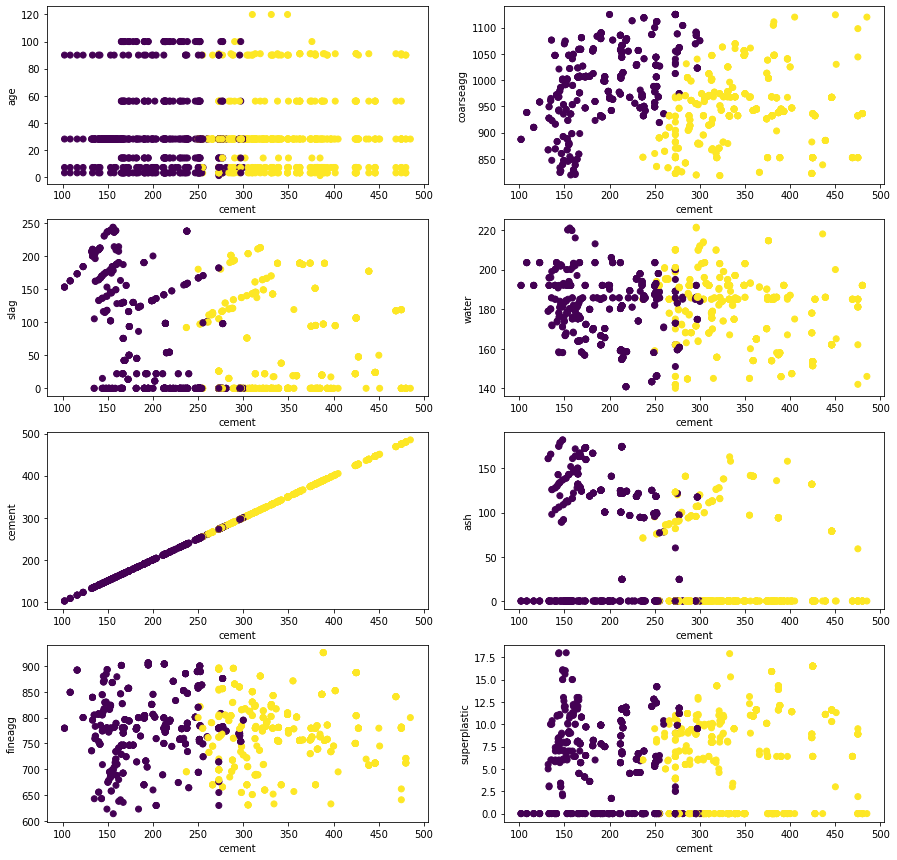

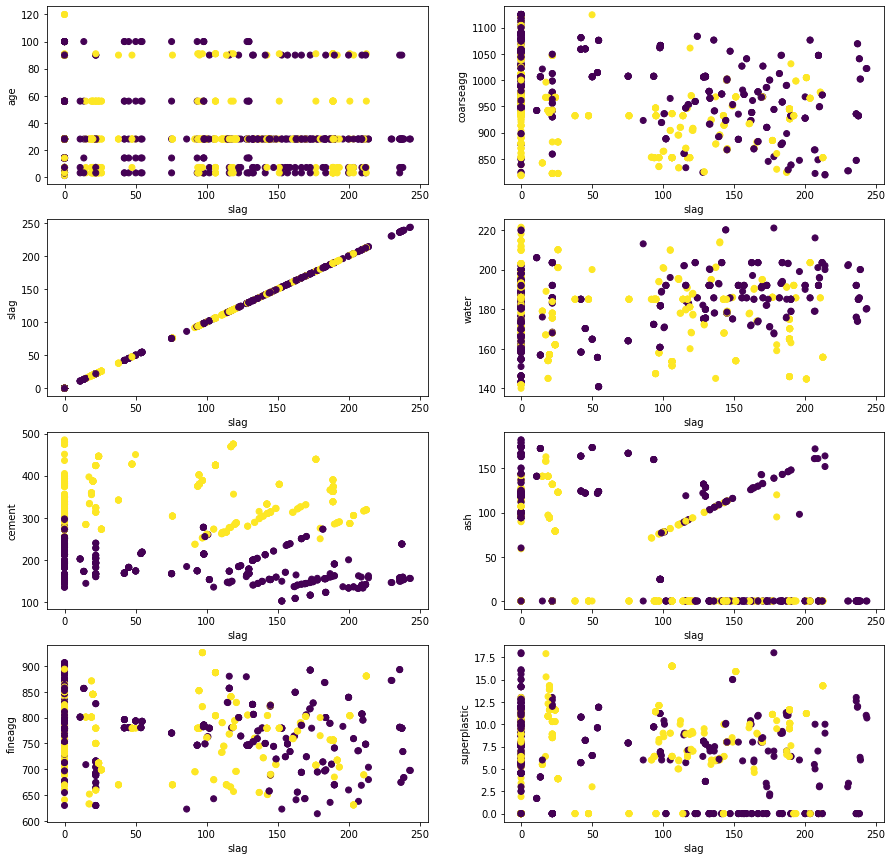

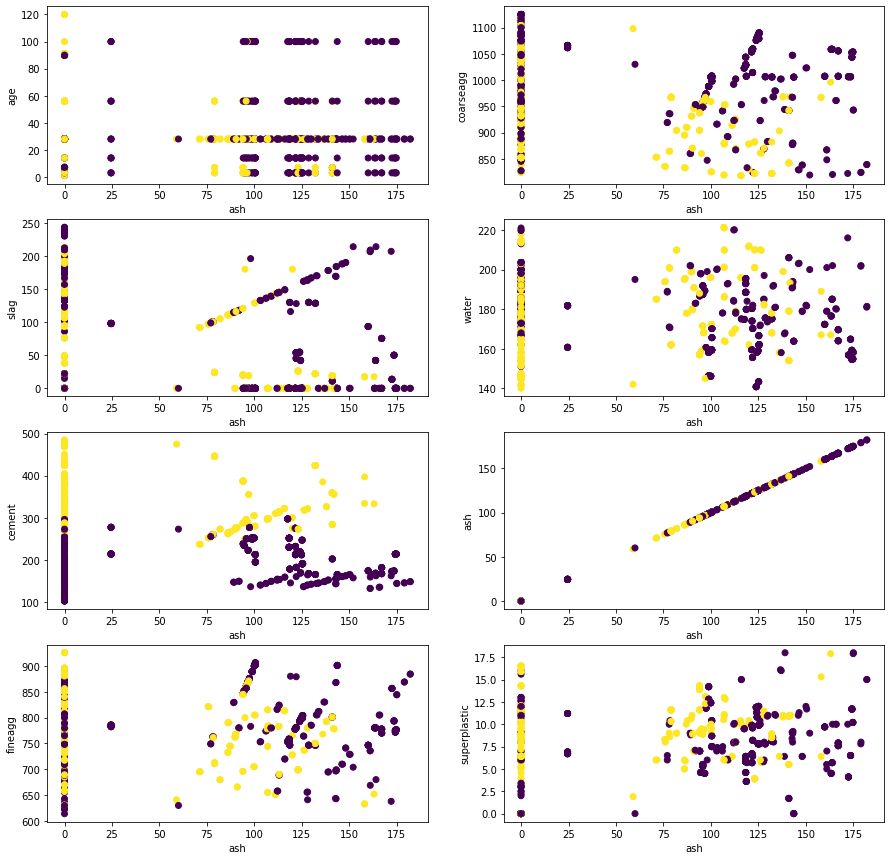

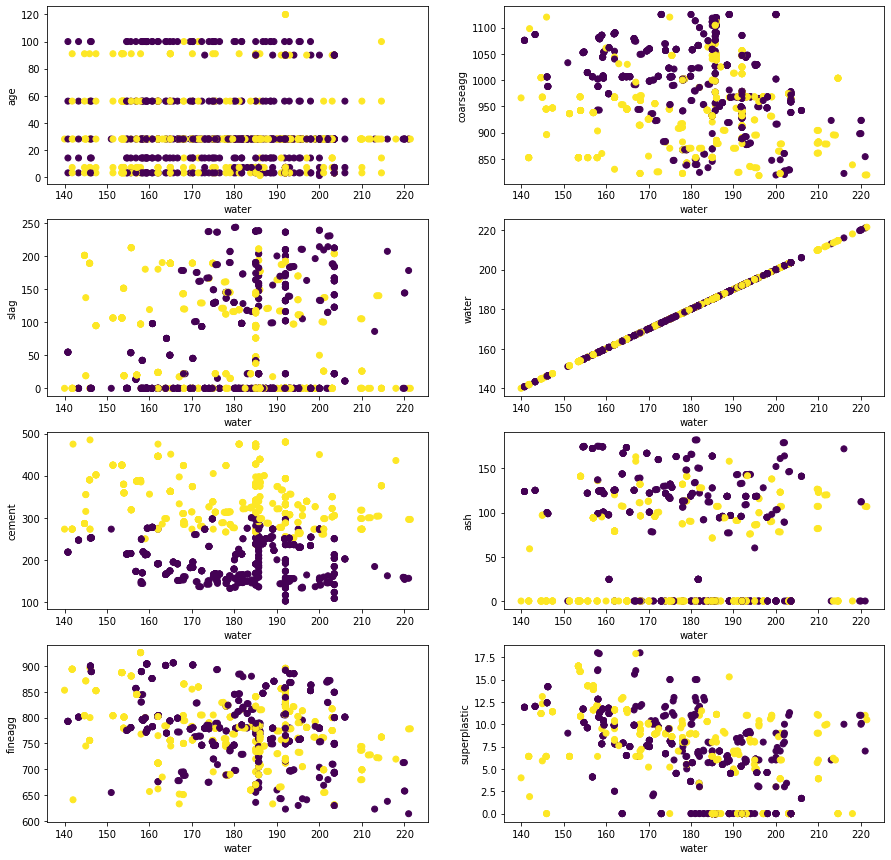

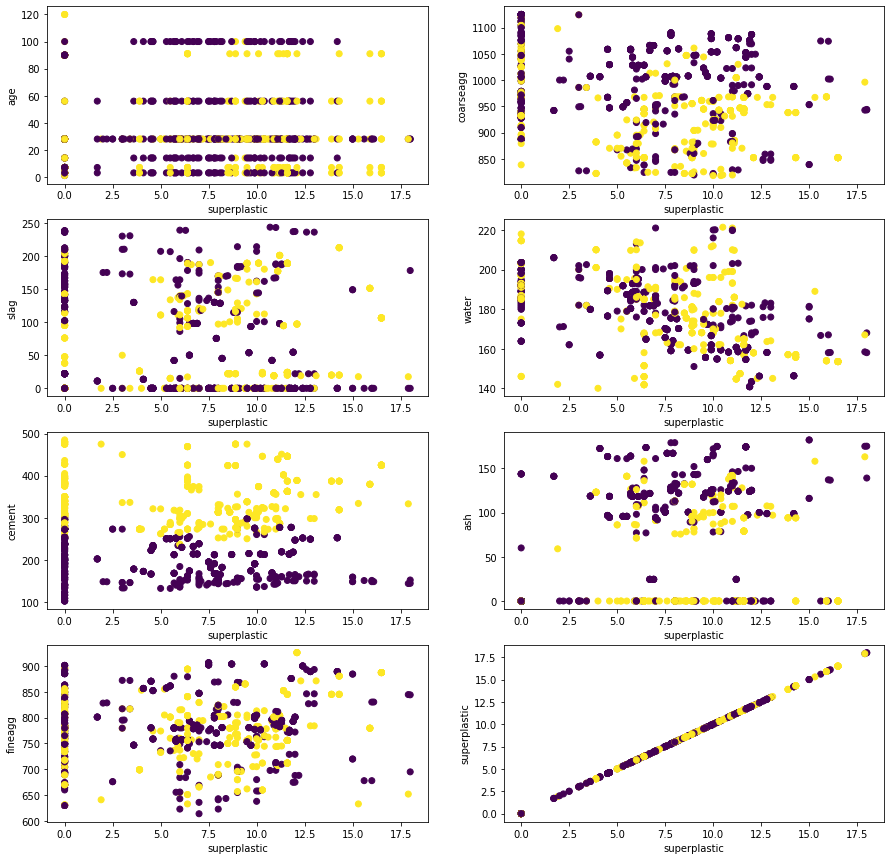

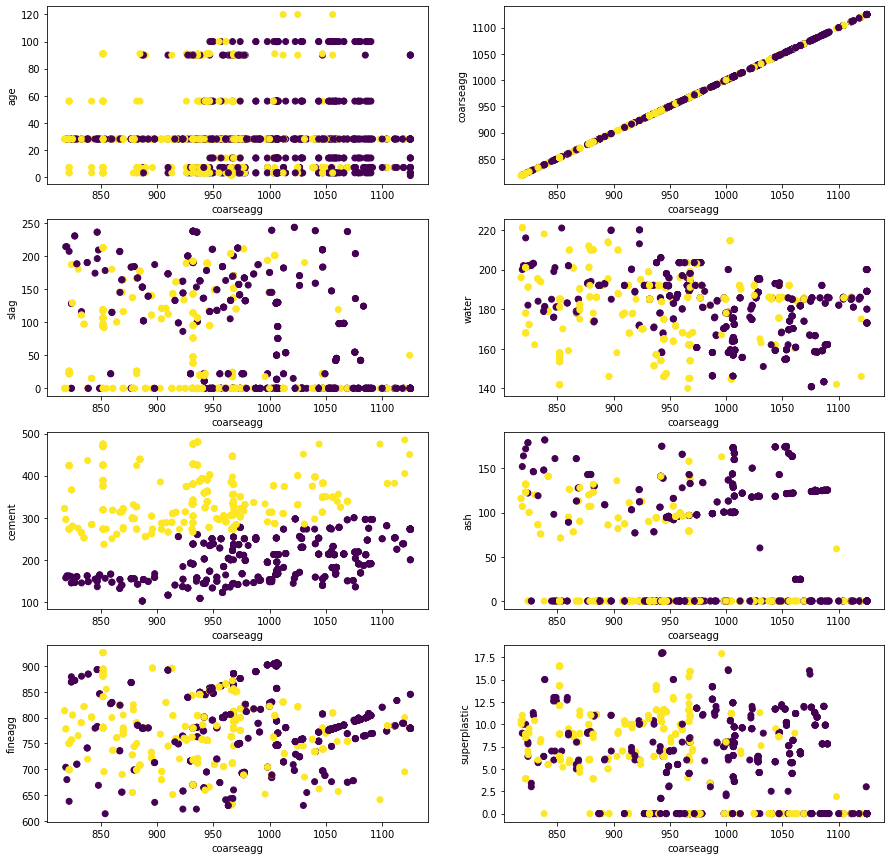

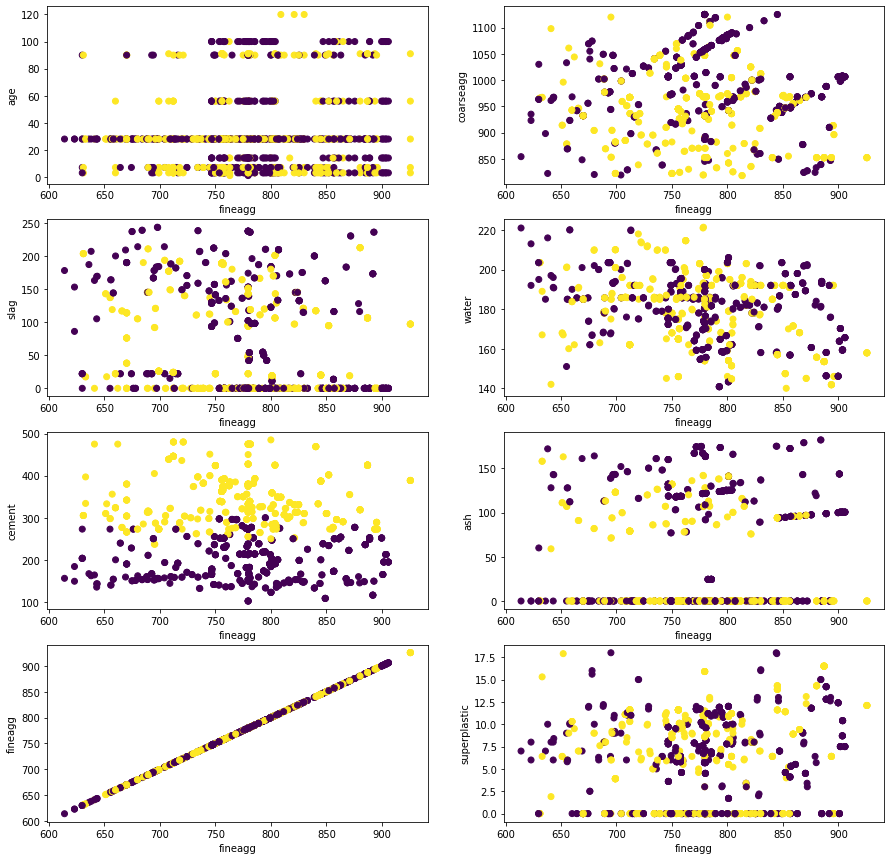

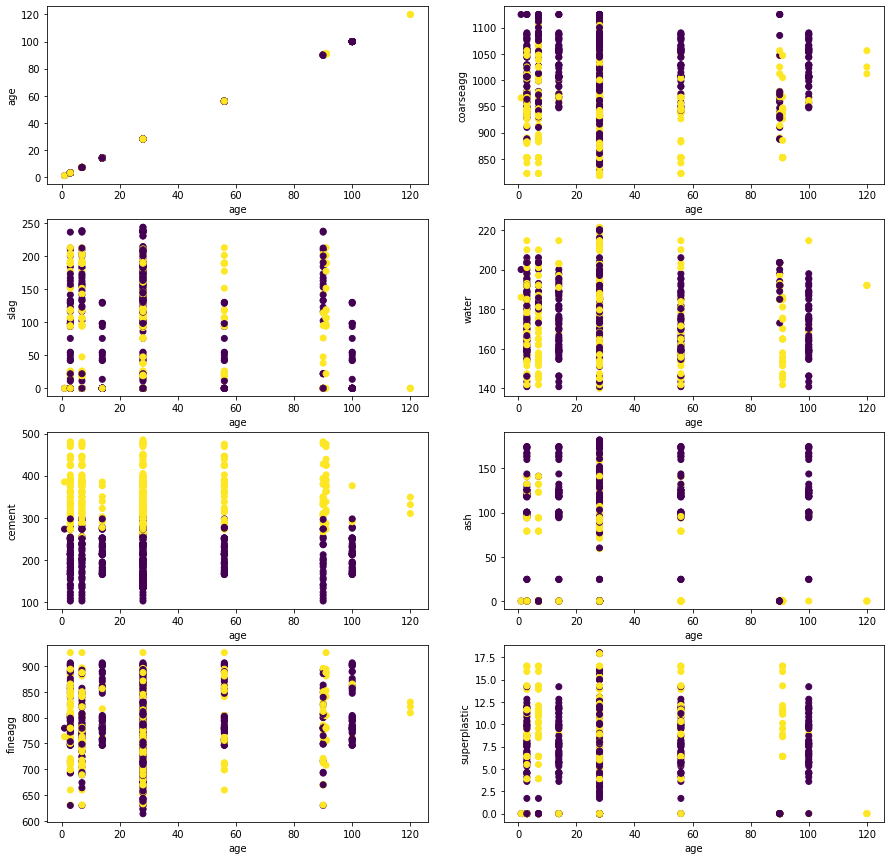

In [49]:
x = new_concrete.iloc[:,:-1]
y = new_concrete.iloc[:,-1]

for col in x.columns:
    kmeansplot(x,col,labels)

### Observations from the cluster analysis
### 1. Clusters can be observed between cement and every independent variable
### 2. Clusters can be observed at age = 100
### 3. Based on the above observations, lets add new features as centroids of this cluster

In [50]:
## Adding features based on clusters

new_df = new_concrete.join(pd.DataFrame(labels,columns=['labels']),how='left')
new_df.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg   age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5  28.0   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2  14.0   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2  28.0   
3   266.0  114.0    0.0  185.0           0.0      932.0    670.0  28.0   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7  28.0   

   strength  labels  
0     29.89       0  
1     23.51       0  
2     29.22       0  
3     45.85       1  
4     18.29       0

In [51]:
## Grouping the variables based on clusters and finding the mean and median for the same
newfeat = new_df.groupby('labels')['cement'].agg(['mean','median'])
newfeat

mean  median
labels                    
0       201.601083   200.0
1       349.257353   339.0

In [52]:
## Merging the mean and median with respect to the labels
new_df = new_df.merge(newfeat,on='labels',how='left')
new_df.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg   age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5  28.0   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2  14.0   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2  28.0   
3   266.0  114.0    0.0  185.0           0.0      932.0    670.0  28.0   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7  28.0   

   strength  labels        mean  median  
0     29.89       0  201.601083   200.0  
1     23.51       0  201.601083   200.0  
2     29.22       0  201.601083   200.0  
3     45.85       1  349.257353   339.0  
4     18.29       0  201.601083   200.0

In [53]:
## Renaming mean and median with cement_mean and cement_median
new_df.rename(columns={'mean':'cement_mean','median':'cement_median'},inplace=True)
new_df.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg   age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5  28.0   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2  14.0   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2  28.0   
3   266.0  114.0    0.0  185.0           0.0      932.0    670.0  28.0   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7  28.0   

   strength  labels  cement_mean  cement_median  
0     29.89       0   201.601083          200.0  
1     23.51       0   201.601083          200.0  
2     29.22       0   201.601083          200.0  
3     45.85       1   349.257353          339.0  
4     18.29       0   201.601083          200.0

In [54]:
## Deleting the labels
new_df.drop('labels',axis=1,inplace=True)

In [55]:
new_df.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg   age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5  28.0   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2  14.0   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2  28.0   
3   266.0  114.0    0.0  185.0           0.0      932.0    670.0  28.0   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7  28.0   

   strength  cement_mean  cement_median  
0     29.89   201.601083          200.0  
1     23.51   201.601083          200.0  
2     29.22   201.601083          200.0  
3     45.85   349.257353          339.0  
4     18.29   201.601083          200.0

In [56]:
## Building models before and after clustering
result_new_concrete = model_building(new_concrete,'strength')
result_newdf = model_building(new_df,'strength')
print('************Result before clustering***************')
print(result_new_concrete)
print('\n\n************Result after clustering***************')
print(result_newdf)

[01:17:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:17:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
************Result before clustering***************
                 model_name  R-square       RMSE
0         Linear Regression  0.529079  10.316596
1          Lasso Regression  0.529903  10.307571
2          Ridge Regression  0.529079  10.316593
3   Decision Tree Regressor  0.716199   8.008830
4   Random Forest Regressor  0.784901   6.972387
5                  Adaboost  0.658313   8.787728
6                   G-Boost  0.780231   7.047679
7                   XGBoost  0.788352   6.916231
8  Support Vector Regressor  0.023676  14.854546
9                       KNN  0.508138  10.543479


************Result after clustering***************
                 model_name 

### After clustering, Random Forrest,XGboost and SVM have performed well
### whereas LinearRegression,decision tree and KNN have failed to perform after clustering

## Feature Importance

### Feature Importance is a part of EDA which helps us to understand the importance of every feature in overall ### predictions or its impact on y-variable 

In [57]:
x_train,x_test,y_train,y_test = TrainTestsplit(new_df,'strength',test_size=0.3)
xgb = XGBRegressor()

In [58]:
xgb.fit(x_train,y_train)

[01:17:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

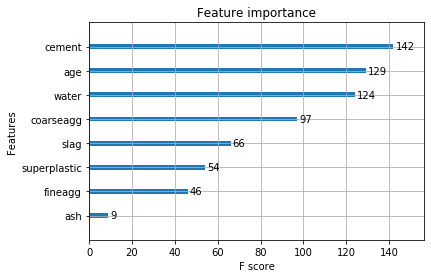

In [59]:
xgboost.plot_importance(xgb)

## Feature selection using xgboost

In [60]:
from numpy import loadtxt,sort
from sklearn.feature_selection import SelectFromModel

In [61]:
xgb_pred = xgb.predict(x_test)
xgb_pred = np.round(xgb_pred,2)
xgb_r2score = r2_score(y_test,xgb_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test,xgb_pred))

In [62]:
print("r-score",xgb_r2score)
print("rmse", xgb_rmse)

r-score 0.7883670674760106
rmse 6.915985924358974


In [63]:
# value = []

# threshold = sort(xgb.feature_importances_) ## Sorting all the feature importance based on their importance
# for thresh in threshold:
#     selection = SelectFromModel(xgb,threshold=thresh,prefit=True)  ## Automatically it will give us the import features form train data
#     select_xtrain = selection.transform(x_train)
#     selection_model = XGBRegressor()
#     selection_model.fit(select_xtrain,y_train)
#     select_xtest = selection.transform(x_test)
#     new_pred = selection_model.predict(select_xtest)
#     result = [thresh,select_xtrain.shape[1],np.sqrt(mean_squared_error(y_test,new_pred)),r2_score(y_test,new_pred)]
#     value.append(result)    

In [64]:
#!pip install xgbfir
import xgbfir

In [65]:
l1 = []
threshold = sort(xgb.feature_importances_) # Sorting all the feature_importance
for thresh in threshold:
    selection = SelectFromModel(xgb,threshold=thresh,prefit=True)
    select_x_train = selection.transform(x_train) ## Automatically it will give us the important features from the train data
    selection_model = XGBRegressor() ## Model name 
    selection_model.fit(select_x_train,y_train)
    selet_x_test = selection.transform(x_test)
    new_pred = selection_model.predict(selet_x_test)
    result = [thresh,select_x_train.shape[1],np.sqrt(mean_squared_error(y_test,new_pred)),r2_score(y_test,new_pred)]
    l1.append(result)
result_df = pd.DataFrame(l1,columns=['threshold','no. of features','RMSE','R2-score'])
result_df

[01:17:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:17:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:17:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:17:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:17:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:17:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:17:54] WARNI

threshold  no. of features       RMSE  R2-score
0   0.000000               10   6.916231  0.788352
1   0.000000               10   6.916231  0.788352
2   0.041695                8   6.916231  0.788352
3   0.068776                7   7.071054  0.778770
4   0.072136                6   7.046164  0.780325
5   0.074461                5   7.134105  0.774807
6   0.119172                4   7.132982  0.774878
7   0.123618                3   8.642761  0.669493
8   0.194181                2   9.042326  0.638228
9   0.305961                1  12.281066  0.332660

In [66]:
#xgboost.__version__  #to check the version of xgboost

In [67]:
#!pip uninstall xgboost

In [68]:
#xgboost.__version__

In [69]:
#!pip install xgboost==0.90

## Creating dataframe by considering only 6 features

In [70]:
x = new_df.drop(['fineagg','ash','strength','cement_mean','cement_median'],axis=1)
x.head() 

cement   slag  water  superplastic  coarseagg   age
0   141.3  212.0  203.5           0.0      971.8  28.0
1   168.9   42.2  158.3          10.8     1080.8  14.0
2   250.0    0.0  187.4           5.5      956.9  28.0
3   266.0  114.0  185.0           0.0      932.0  28.0
4   154.8  183.4  193.3           9.1     1047.4  28.0

In [71]:
y = new_df['strength']
y = pd.DataFrame(y)
y.head()

strength
0     29.89
1     23.51
2     29.22
3     45.85
4     18.29

## Performing K-fold cross validation

In [72]:
def kfold_cv(x,y,folds = 10):
    
    lr = LinearRegression()
    ls = Lasso()
    rr = Ridge()
    dt = DecisionTreeRegressor()
    rf = RandomForestRegressor()
    abb = AdaBoostRegressor()
    gb = GradientBoostingRegressor()
    xgb = XGBRegressor()
    #svr = SVR()
    knn = KNeighborsRegressor()
    
    score_lr=cross_val_score(lr,x,y,cv=folds)
    score_ls=cross_val_score(ls,x,y,cv=folds)
    score_rr=cross_val_score(rr,x,y,cv=folds)
    score_dt=cross_val_score(dt,x,y,cv=folds)
    score_rf=cross_val_score(rf,x,y,cv=folds)
    score_abb=cross_val_score(abb,x,y,cv=folds)
    score_gb=cross_val_score(gb,x,y,cv=folds)
    score_xgb=cross_val_score(xgb,x,y,cv=folds)
    #score_svr=cross_val_score(svr,x,y,cv=folds)
    score_knn=cross_val_score(knn,x,y,cv=folds)
    
    models = [lr,ls,rr,dt,rf,abb,gb,xgb,123,knn]
    model_names = ['Linear Regression','Lasso Regression','Ridge Regression','Decision tree','Random Forest','Adaboost','G-boost','XGboost',
                  '123','KNN']
    scores = [score_lr,score_ls,score_rr,score_dt,score_rf,score_abb,score_gb,score_xgb,123,score_knn]
    
    result = []
    for x in range(0,len(models)):
        print(model_names[x])
        sc_mean = np.mean(scores[x])
        sc_std = np.std(scores[x])
        m_name = model_names[x]
        var = [m_name,sc_mean,sc_std]
        result.append(var)
        
    result_df = pd.DataFrame(result,columns=['model name','average accuracy','std dev'])
    return result_df

In [73]:
kfold_cv(x,y)

[01:18:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:18:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:18:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:18:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:18:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:18:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:18:01] WARNI

model name  average accuracy   std dev
0  Linear Regression          0.486191  0.095849
1   Lasso Regression          0.486070  0.095383
2   Ridge Regression          0.486191  0.095849
3      Decision tree          0.747792  0.066887
4      Random Forest          0.803894  0.044550
5           Adaboost          0.646800  0.048431
6            G-boost          0.776799  0.042115
7            XGboost          0.775965  0.038823
8                123        123.000000  0.000000
9                KNN          0.587351  0.062666

## Grid Search Cross Validation

In [74]:
## Performing grid search CV on linear regression
lr_parameters = {'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False]}

linear = LinearRegression()
linear_grid = GridSearchCV(linear,param_grid=lr_parameters,cv=5,verbose=True,scoring='r2')
linear_grid.fit(x_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=True)

In [75]:
print('best parameter for linear regression:',linear_grid.best_params_)

best parameter for linear regression: {'copy_X': True, 'fit_intercept': True, 'normalize': False}


In [76]:
new_linear = LinearRegression({'copy_X': True, 'fit_intercept': True, 'normalize': False})
new_linear.fit(x_train,y_train)
new_linear_pred = new_linear.predict(x_test)
print('r-score:',r2_score(y_test,new_linear_pred))
print('rmse:',np.sqrt(mean_squared_error(y_test,new_linear_pred)))

r-score: 0.5284534956621518
rmse: 10.32344719391126


In [77]:
## Default model gives better accuacy than after tuning the parameters

In [78]:
## KNN
KNN_parameters = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = KNeighborsRegressor()
knn_grid = GridSearchCV(knn,param_grid=KNN_parameters,cv=5,verbose=True,scoring='r2')
knn_grid.fit(x_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=True)

In [79]:
KNeighborsRegressor()

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [80]:
print('best parameter for knn:',knn_grid.best_params_)

best parameter for knn: {'n_neighbors': 3}


In [81]:
new_knn = KNeighborsRegressor(n_neighbors=3)
new_knn.fit(x_train,y_train)
knn_pred = new_knn.predict(x_test)
print('r-score:',r2_score(y_test,knn_pred))
print('rmse:',np.sqrt(mean_squared_error(y_test,knn_pred)))

r-score: 0.5710417215390728
rmse: 9.846230596422613


In [82]:
## KNN gives a better accuracy after tuning

In [83]:
## Implementation of Grid search cv on decision tree
## Decision Tress splitting criteria
## For classification problem = criteria: Gini or Entropy
## For regression based problem = criteria for splitting: MSE, Mean absolute error(mean distance of data points from the regression line,it should always be positive)

In [84]:
dt_para = {'criterion':['mse','mae'],'max_depth':[2,3,4,5,6,7,8,9,10,None],'max_features':['auto','sqrt']}
dt_reg = DecisionTreeRegressor()
dt_grid = GridSearchCV(dt_reg,param_grid=dt_para,cv=5,verbose=True,scoring='r2')
dt_grid.fit(x,y) 

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    4.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, None],
                         'max_features': ['auto', 'sqrt']},
             pre_dispatc

In [85]:
print('best parameter for knn:',dt_grid.best_params_)

best parameter for knn: {'criterion': 'mae', 'max_depth': None, 'max_features': 'auto'}


In [86]:
dt_new = DecisionTreeRegressor(criterion= 'mae', max_depth = None, max_features = 'auto')
dt_new.fit(x_train,y_train)
dt_new_pred = dt_new.predict(x_test)
print('r-score:',r2_score(y_test,dt_new_pred))
print('rmse:',np.sqrt(mean_squared_error(y_test,dt_new_pred)))

r-score: 0.6510099718337168
rmse: 8.881145490675019


In [87]:
## Accuracy before the parameter tuning is better than after tuning

In [88]:
## Random Forest

In [89]:
# rf_para = {'criterion':['mse','mae'],'max_depth':[2,3,4,5,6,7,8,9,10,None],'max_features':['auto','sqrt'],'n_estimators':[200,400,600,800]}
# rf_reg = RandomForestRegressor()
# rf_grid = GridSearchCV(rf_reg,param_grid=rf_para,cv=5,verbose=True,scoring='r2')
# rf_grid.fit(x,y)

In [90]:
# best parameters
# {'criterion': 'mse', 'max_depth': None, 'max_features': 'auto',n_estimators:200}

In [91]:
rf_new = RandomForestRegressor(criterion= 'mse', max_depth = None, max_features = 'auto',n_estimators=200)
rf_new.fit(x_train,y_train)
rf_new_pred = rf_new.predict(x_test)
print('r-score:',r2_score(y_test,rf_new_pred))
print('rmse:',np.sqrt(mean_squared_error(y_test,rf_new_pred)))

r-score: 0.7945917319273965
rmse: 6.813518448757683


In [92]:
# Adaboost

In [93]:
#AdaBoostRegressor()
#AdaBoostRegressor(
   # base_estimator=None,
   # n_estimators=50,
    # learning_rate=1.0,
    # loss='linear',
    # random_state=None)

In [94]:
ada_reg=AdaBoostRegressor()
ada_reg_para={'n_estimators':[500,100,1000,2000],'learning_rate':[.001,0.01,.05,.3,.1,1],'loss':['linear','square','exponential']}
ada_reg_grid=GridSearchCV(estimator=ada_reg,param_grid=ada_reg_para,n_jobs=1,cv=5,verbose=True,scoring='r2')
ada_reg_grid.fit(x,y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed: 14.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=None),
             iid='warn', n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.05, 0.3, 0.1, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [500, 100, 1000, 2000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=True)

In [95]:
print('best parameter for add:',ada_reg_grid.best_params_)

best parameter for add: {'learning_rate': 1, 'loss': 'square', 'n_estimators': 2000}


In [96]:
ada_new = AdaBoostRegressor(learning_rate= 1, loss= 'square', n_estimators= 1000)
ada_new.fit(x_train,y_train)
ada_new_pred = ada_new.predict(x_test)
print('r-score:',r2_score(y_test,ada_new_pred))
print('rmse:',np.sqrt(mean_squared_error(y_test,ada_new_pred)))

r-score: 0.7020869924771584
rmse: 8.20554079008791


In [97]:
## Adaboost has better accuracy after tuning
## Before tuning(accuracy = Adaboost  0.664227);After tuning (accuracy = Adaboost 0.7038731589910208 )

# G-Boost  original 0.783003; after tuning r-score: 0.8107285692493843   
# XGBoost  original 0.788352; after tuning r-score: 0.8118318566375229

In [98]:
## G-boost

In [99]:
gb_reg=GradientBoostingRegressor()
gb_reg_para={'n_estimators':[800,850,900,950,1000],'learning_rate':[.001,0.01,.05,.3,.1,1]}
gb_reg_grid=GridSearchCV(estimator=gb_reg,param_grid=gb_reg_para,n_jobs=1,cv=5,verbose=True,scoring='r2')
gb_reg_grid.fit(x,y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  1.9min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                

In [100]:
print('best parameter for g-boost:',gb_reg_grid.best_params_)

best parameter for g-boost: {'learning_rate': 0.1, 'n_estimators': 1000}


In [101]:
gb_new = GradientBoostingRegressor(learning_rate = 0.1,n_estimators = 1000)
gb_new.fit(x_train,y_train)
gb_new_pred = gb_new.predict(x_test)
print('r-score:',r2_score(y_test,gb_new_pred))
print('rmse:',np.sqrt(mean_squared_error(y_test,gb_new_pred)))

r-score: 0.8099518946535321
rmse: 6.553816055248431


In [102]:
## XG Boost

In [103]:
xg_reg= XGBRegressor()
xg_reg_para={'n_estimators':[500,100,1000,2000],'learning_rate':[.001,0.01,.05,.3,.1,1]}
xg_reg_grid=GridSearchCV(estimator=xg_reg,param_grid=xg_reg_para,n_jobs=1,cv=5,verbose=True,scoring='r2')
xg_reg_grid.fit(x,y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[01:34:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[01:34:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:34:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:34:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:34:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:34:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:34:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:34:54] WARNI

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.8min finished


[01:36:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='warn', n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.05, 0.3, 0.1, 1],
                         'n_estimators': [500, 10

In [104]:
print('best parameter for g-boost:',xg_reg_grid.best_params_)

best parameter for g-boost: {'learning_rate': 0.1, 'n_estimators': 1000}


In [105]:
xg_new = GradientBoostingRegressor(learning_rate = 0.1,n_estimators = 1000)
xg_new.fit(x_train,y_train)
xg_new_pred = xg_new.predict(x_test)
print('r-score:',r2_score(y_test,xg_new_pred))
print('rmse:',np.sqrt(mean_squared_error(y_test,xg_new_pred)))

r-score: 0.8096581155380628
rmse: 6.558879591101165


In [106]:
# SVM - should be performed in collab

In [107]:
# SVR_parameter = {'kernel':['linear','poly','rbf','sigmoid']}
# svr = SVR()
# svr_grid=GridSearchCV(estimator=svr,param_grid=SVR_parameter,n_jobs=1,cv=5,verbose=True,scoring='r2')
# svr_grid.fit(x,y)

## Implementation of Learning curve

In [108]:
def generatelearningcurve(model_name,model_estimator):
    train_size,train_score,test_score = learning_curve(estimator=model_estimator,X=x,y=y,cv=10)
    train_score_mean=np.mean(train_score,axis=1)
    test_score_mean=np.mean(test_score,axis=1)
    plt.plot(train_size,train_score_mean,color='blue')
    plt.plot(train_size,test_score_mean,color='red')
    plt.xlabel('sample')
    plt.ylabel('accuracy score')
    plt.title('Learning curve for ' + model_name)
    plt.legend(('training score','testing score'),loc='best')

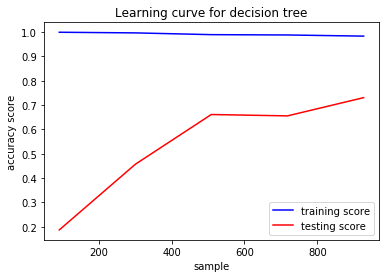

In [109]:
generatelearningcurve('decision tree',dt_new)

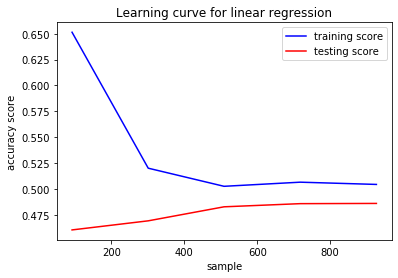

In [110]:
generatelearningcurve('linear regression',linear)

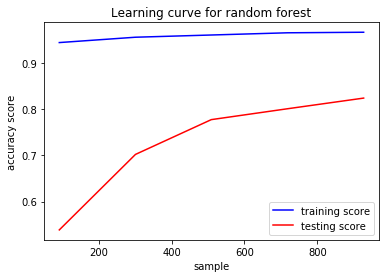

In [111]:
generatelearningcurve('random forest',rf_new)

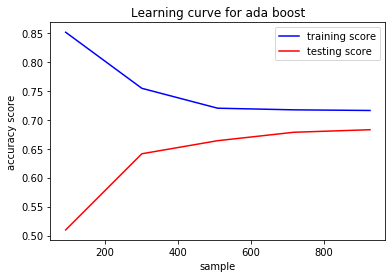

In [112]:
generatelearningcurve('ada boost',ada_new)

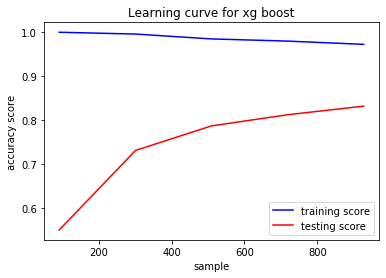

In [113]:
generatelearningcurve('xg boost',xg_new)

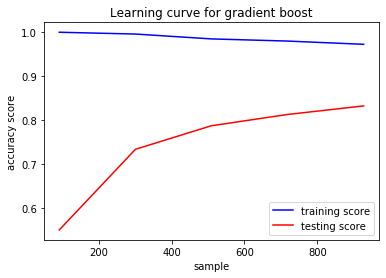

In [114]:
generatelearningcurve('gradient boost',gb_new)